In [47]:
# Call the necessary library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 


In [ ]:
# Upload my Data and filtre it 
light_data=pd.read_csv("players_data_light-2025_2026.csv")   # Load the light dataset
full_data=pd.read_csv("players_data-2025_2026.csv")    # Load the full datasetpd
light_data['Nation']=light_data['Nation'].apply(lambda x : str(x).split()[-1]) # Extrait only the last country name
features=["Player","Nation","Squad","Comp","Age","MP","Starts","Min","90s","Gls","Ast","G+A","xG","xAG","npxG","G-PK"] # The necessary columns 
df=light_data[light_data["Pos"]=="FW"]
att_data=df[features]   # My data 



In [203]:
att_data.head() # The first five rows 

,Player,Nation,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
0,Brenden Aaronson,USA,Leeds United,eng Premier League,24.0,4,1,156.0,1.7,0,0,0,0.1,0.5,0.1,0
8,Zakaria Aboukhlal,MAR,Torino,it Serie A,25.0,3,0,69.0,0.8,0,0,0,0.2,0.0,0.2,0
11,Giorgi Abuashvili,GEO,Metz,fr Ligue 1,22.0,3,2,141.0,1.6,0,0,0,0.1,0.1,0.1,0
15,Akor Adams,NGA,Sevilla,es La Liga,25.0,2,2,180.0,2.0,0,1,1,0.7,0.1,0.7,0
16,Che Adams,SCO,Torino,it Serie A,29.0,3,0,83.0,0.9,0,0,0,0.0,0.0,0.0,0


In [204]:
att_data.tail() # The last five rows 

,Player,Nation,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
1953,Bertuğ Yıldırım,TUR,Rennes,fr Ligue 1,23.0,1,0,3.0,0.0,0,0,0,0.0,0.2,0.0,0
1959,Mattia Zaccagni,ITA,Lazio,it Serie A,30.0,3,3,245.0,2.7,1,0,1,1.2,0.0,1.2,1
1965,Nicolò Zaniolo,ITA,Udinese,it Serie A,26.0,1,0,30.0,0.3,0,0,0,0.0,0.0,0.0,0
1978,Budu Zivzivadze,GEO,Heidenheim,de Bundesliga,31.0,3,2,124.0,1.4,0,0,0,0.5,0.0,0.5,0
1985,Milan Đurić,BIH,Parma,it Serie A,35.0,2,0,9.0,0.1,0,0,0,0.1,0.0,0.1,0


In [51]:
att_data.isnull().sum() # Check the missing values 

Player    0
Nation    0
Squad     0
Comp      0
Age       2
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
xG        0
xAG       0
npxG      0
G-PK      0
dtype: int64

In [52]:
att_data["Nation"].fillna("N/A",inplace=True)  # Fill the missing values in Nation columns 
att_data["Age"].fillna(att_data["Age"].mean(),inplace=True) # Fill the missing values in Age columns 
att_data["Min"].fillna(att_data["Min"].mean(),inplace=True) # Fill the missing values in Min columns 


C:\Users\aouam\AppData\Local\Temp\ipykernel_12668\1585833761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  att_data["Nation"].fillna("N/A",inplace=True)  # Fill the missing values in Nation columns
C:\Users\aouam\AppData\Local\Temp\ipykernel_12668\1585833761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_data["Nation"].fillna("N

In [53]:
att_data.isnull().sum() # Check if there is more missing values 

Player    0
Nation    0
Squad     0
Comp      0
Age       0
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
xG        0
xAG       0
npxG      0
G-PK      0
dtype: int64

In [54]:
att_data.info() # Details about my data 

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 1985
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  363 non-null    object 
 1   Nation  363 non-null    object 
 2   Squad   363 non-null    object 
 3   Comp    363 non-null    object 
 4   Age     363 non-null    float64
 5   MP      363 non-null    int64  
 6   Starts  363 non-null    int64  
 7   Min     363 non-null    float64
 8   90s     363 non-null    float64
 9   Gls     363 non-null    int64  
 10  Ast     363 non-null    int64  
 11  G+A     363 non-null    int64  
 12  xG      363 non-null    float64
 13  xAG     363 non-null    float64
 14  npxG    363 non-null    float64
 15  G-PK    363 non-null    int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 48.2+ KB


In [55]:
att_data.describe() # Basic descriptive statistics

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,25.135734,2.556474,1.589532,139.641873,1.551515,0.493113,0.250689,0.743802,0.509917,0.208264,0.431956,0.421488
std,4.290665,1.143795,1.380448,104.725918,1.163922,0.838857,0.580977,1.111434,0.660161,0.333553,0.558088,0.762578
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.500000,0.000000,44.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,1.000000,125.000000,1.400000,0.000000,0.000000,0.000000,0.300000,0.100000,0.200000,0.000000
75%,28.000000,4.000000,3.000000,226.500000,2.500000,1.000000,0.000000,1.000000,0.800000,0.300000,0.700000,1.000000
max,39.000000,5.000000,5.000000,414.000000,4.600000,5.000000,4.000000,8.000000,4.900000,2.100000,4.900000,5.000000


In [56]:
# Dimensions of my data
att_data.shape
print(f"Rows:{att_data.shape[0]}")   # Number of rows 
print(f"Columns:{att_data.shape[1]}") # Number of columns

Rows:363
Columns:16


In [57]:
# Statics by Nation
nation_data=att_data.groupby("Nation").agg(
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Match_played=("MP",'count'),
    Minutes_playes=("Min",'sum'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_Assist=("G+A",'sum'),
    Goals_exp_pen=("G-PK",'sum')
).reset_index()
nation_data


,Nation,Players,Age,Match_played,Minutes_playes,Goals,Assist,Goals_Assist,Goals_exp_pen
0,ALB,1,24.000000,1,2.0,0,0,0,0
1,ALG,3,23.333333,3,180.0,2,0,2,1
2,ANG,1,27.000000,1,22.0,0,0,0,0
3,ARG,12,24.333333,12,1780.0,5,7,12,5
4,AUT,4,25.750000,4,537.0,0,2,2,0
...,...,...,...,...,...,...,...,...,...
63,VEN,1,35.000000,1,163.0,0,0,0,0
64,WAL,3,26.333333,3,642.0,2,0,2,2
65,ZAM,1,24.000000,1,58.0,0,0,0,0
66,ZIM,1,29.000000,1,295.0,0,1,1,0


In [58]:
# Statics by Team
Team_data=att_data.groupby("Squad").agg(
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Match_played=("MP",'sum'),
    Minutes_playes=("Min",'sum'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_Assist=("G+A",'sum'),
    Goals_exp_pen=("G-PK",'sum')
).reset_index()
Team_data


,Squad,Players,Age,Match_played,Minutes_playes,Goals,Assist,Goals_Assist,Goals_exp_pen
0,Alavés,1,28.0,4,271.0,1,0,1,1
1,Angers,3,21.0,6,350.0,2,0,2,2
2,Arsenal,8,24.5,20,1057.0,4,2,6,3
3,Aston Villa,1,29.0,4,352.0,0,0,0,0
4,Atalanta,2,25.5,5,270.0,1,3,4,1
...,...,...,...,...,...,...,...,...,...
90,Villarreal,5,27.0,8,433.0,1,2,3,1
91,Werder Bremen,6,23.0,13,677.0,3,4,7,3
92,West Ham,5,27.0,14,772.0,2,1,3,2
93,Wolfsburg,5,24.2,14,806.0,3,1,4,2


In [59]:
# Statics by League
Ligue_data=att_data.groupby("Comp").agg(
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Match_played=("MP",'sum'),
    Minutes_playes=("Min",'sum'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_Assist=("G+A",'sum'),
    Goals_exp_pen=("G-PK",'sum')
).reset_index()
Ligue_data


,Comp,Players,Age,Match_played,Minutes_playes,Goals,Assist,Goals_Assist,Goals_exp_pen
0,de Bundesliga,63,24.541837,144,8367.0,39,21,60,32
1,eng Premier League,93,25.010753,270,14934.0,45,21,66,40
2,es La Liga,75,25.986667,200,10409.0,41,19,60,35
3,fr Ligue 1,62,23.838710,166,8774.0,36,17,53,31
4,it Serie A,70,26.073368,148,8206.0,18,13,31,15


In [267]:
# Statics by players
players_data=att_data.groupby("Player").agg(
    Age=("Age",'mean'),
    Match_played=("MP",'sum'),
    Minutes_playes=("Min",'sum'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_Assist=("G+A",'sum'),
    Goals_exp_pen=("G-PK",'sum')
).reset_index()
players_data

,Player,Age,Match_played,Minutes_playes,Goals,Assist,Goals_Assist,Goals_exp_pen
0,Abde Ezzalzouli,23.0,1,19.0,0,1,1,0
1,Abdoulie Ceesay,21.0,1,23.0,0,0,0,0
2,Abdón Prats,32.0,1,23.0,0,0,0,0
3,Abu Kamara,22.0,1,23.0,0,0,0,0
4,Adam Buksa,29.0,2,58.0,0,0,0,0
...,...,...,...,...,...,...,...,...
352,Zakaria Aboukhlal,25.0,3,69.0,0,0,0,0
353,Zian Flemming,27.0,2,22.0,0,0,0,0
354,Álex Forés,24.0,1,57.0,0,0,0,0
355,Álvaro Morata,32.0,2,55.0,0,0,0,0


In [61]:
# Most goals 
Most_goals=players_data[["Player","Goals","Goals_exp_pen"]].sort_values(by=["Goals","Goals_exp_pen"],ascending=False).reset_index()
Most_goals.drop(columns='index',inplace=True)
Most_goals


,Player,Goals,Goals_exp_pen
0,Erling Haaland,5,5
1,Harry Kane,5,4
2,Serhou Guirassy,4,4
3,Kylian Mbappé,4,3
4,Andreas Hountondji,3,3
...,...,...,...
352,Zakaria Aboukhlal,0,0
353,Zian Flemming,0,0
354,Álex Forés,0,0
355,Álvaro Morata,0,0


In [62]:
# Most assist
Most_assist=players_data[["Player","Assist"]].sort_values(by=["Assist"],ascending=False).reset_index()
Most_assist.drop(columns="index",inplace=True)
Most_assist

,Player,Assist
0,Jack Grealish,4
1,Nikola Krstović,3
2,Harry Kane,3
3,Mason Greenwood,3
4,Félix Correia,3
...,...,...
352,Walid Cheddira,0
353,Václav Černý,0
354,Vladyslav Vanat,0
355,Vincenzo Grifo,0


In [268]:
# Best performance
Best_performance=players_data[["Player","Goals_Assist","Minutes_playes"]].sort_values(by=["Goals_Assist","Minutes_playes"],ascending=False).reset_index()
Best_performance.drop(columns='index',inplace=True)
Best_performance

,Player,Goals_Assist,Minutes_playes
0,Harry Kane,8,238.0
1,Kylian Mbappé,5,355.0
2,Erling Haaland,5,338.0
3,Mason Greenwood,5,315.0
4,Luis Díaz,5,255.0
...,...,...,...
352,Bilal Brahimi,0,1.0
353,Harrison Armstrong,0,1.0
354,Julio Soler,0,1.0
355,Luca Moro,0,1.0


Text(0.5, 1.0, 'Top nations by Players')

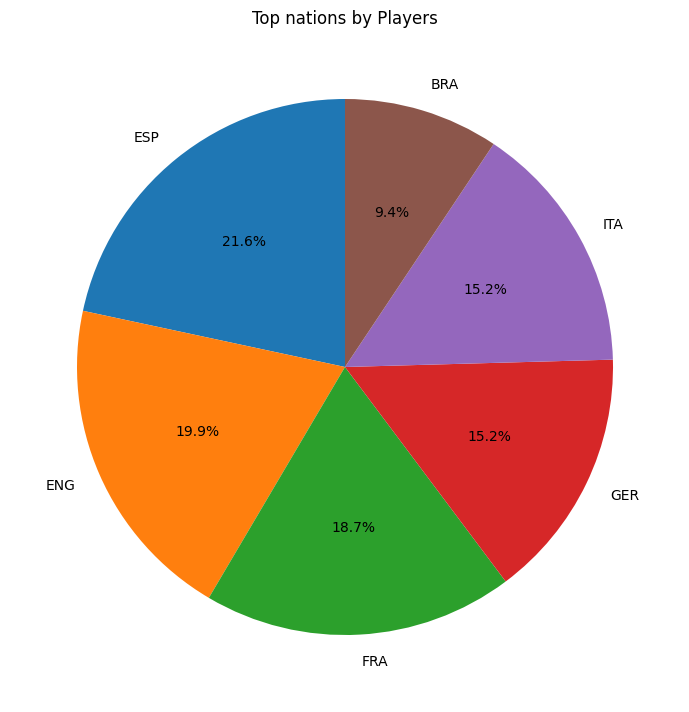

In [64]:
# Top nations by Players
temp5=nation_data[["Nation","Players"]].sort_values(by="Players",ascending=False).reset_index()
temp5.drop(columns='index',inplace=True)
nation_player=temp5[temp5["Players"]>15]
total=sum(nation_player["Players"])
pourcentage_nation=[(i*100/total) for i in nation_player["Players"]]
plt.figure(figsize=(17,7))
plt.pie(pourcentage_nation,labels=nation_player["Nation"],autopct='%1.1f%%',startangle=90)
plt.tight_layout()
plt.title("Top nations by Players")


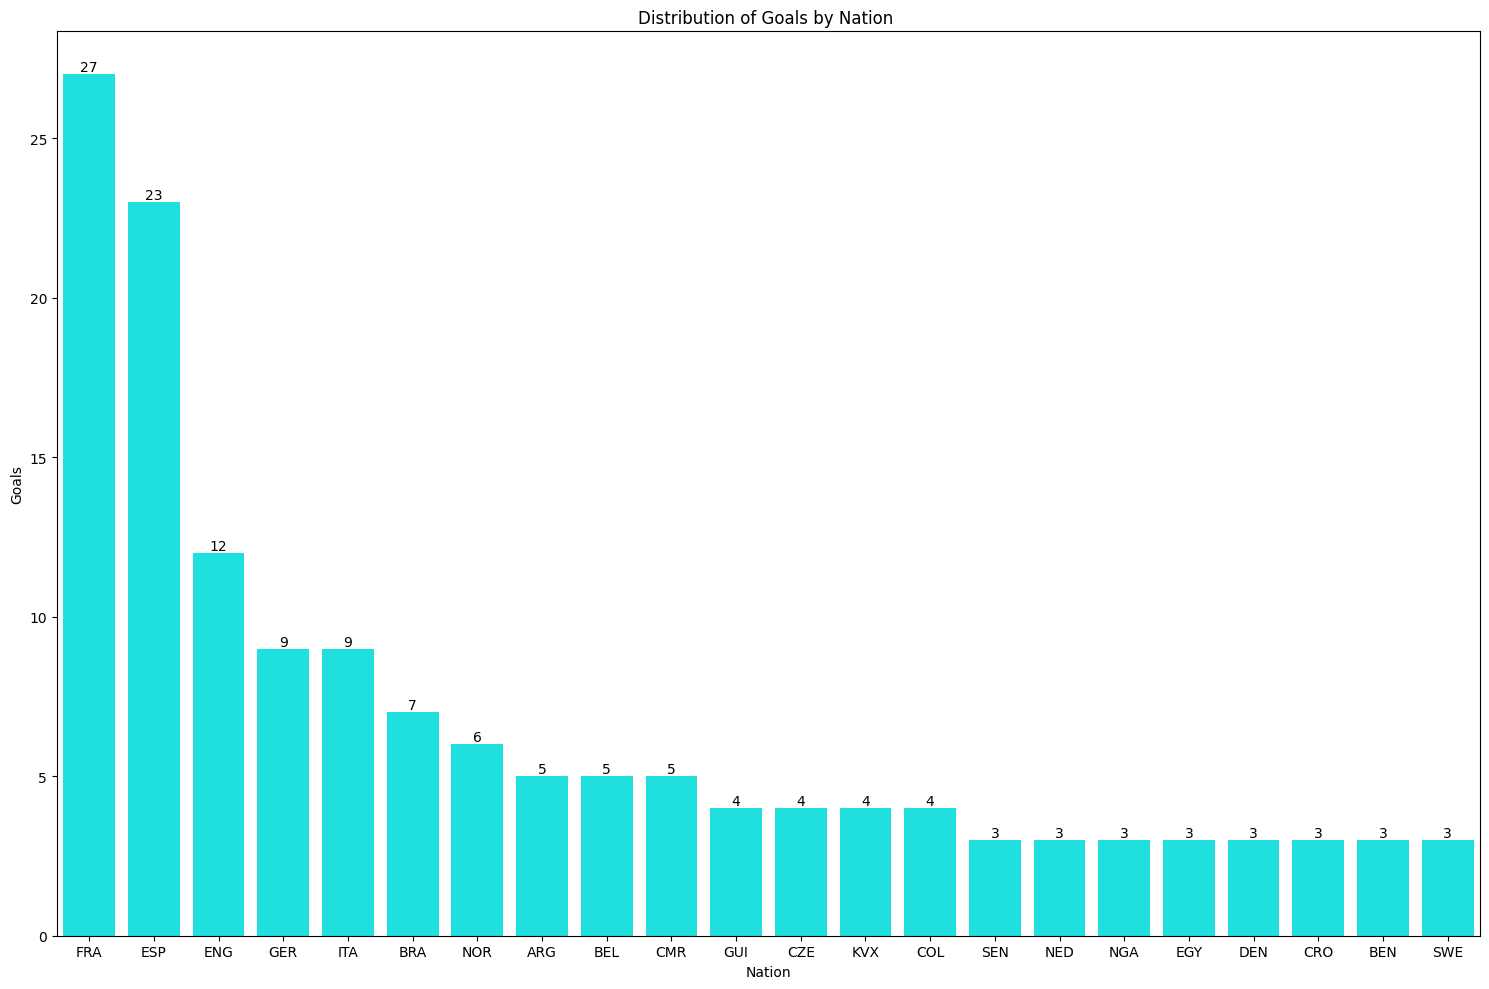

In [118]:
# Distribution of goals by nation 
temp=nation_data[["Nation","Goals"]].sort_values(by='Goals',ascending=False).reset_index()
temp.drop(columns='index',inplace=True)
nation_goals=temp[temp["Goals"]>2]
plt.figure(figsize=(15,10))
sns.barplot(x=nation_goals["Nation"],y=nation_goals["Goals"],color='cyan')
for i ,v in enumerate(nation_goals["Goals"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Goals by Nation ")
plt.tight_layout()



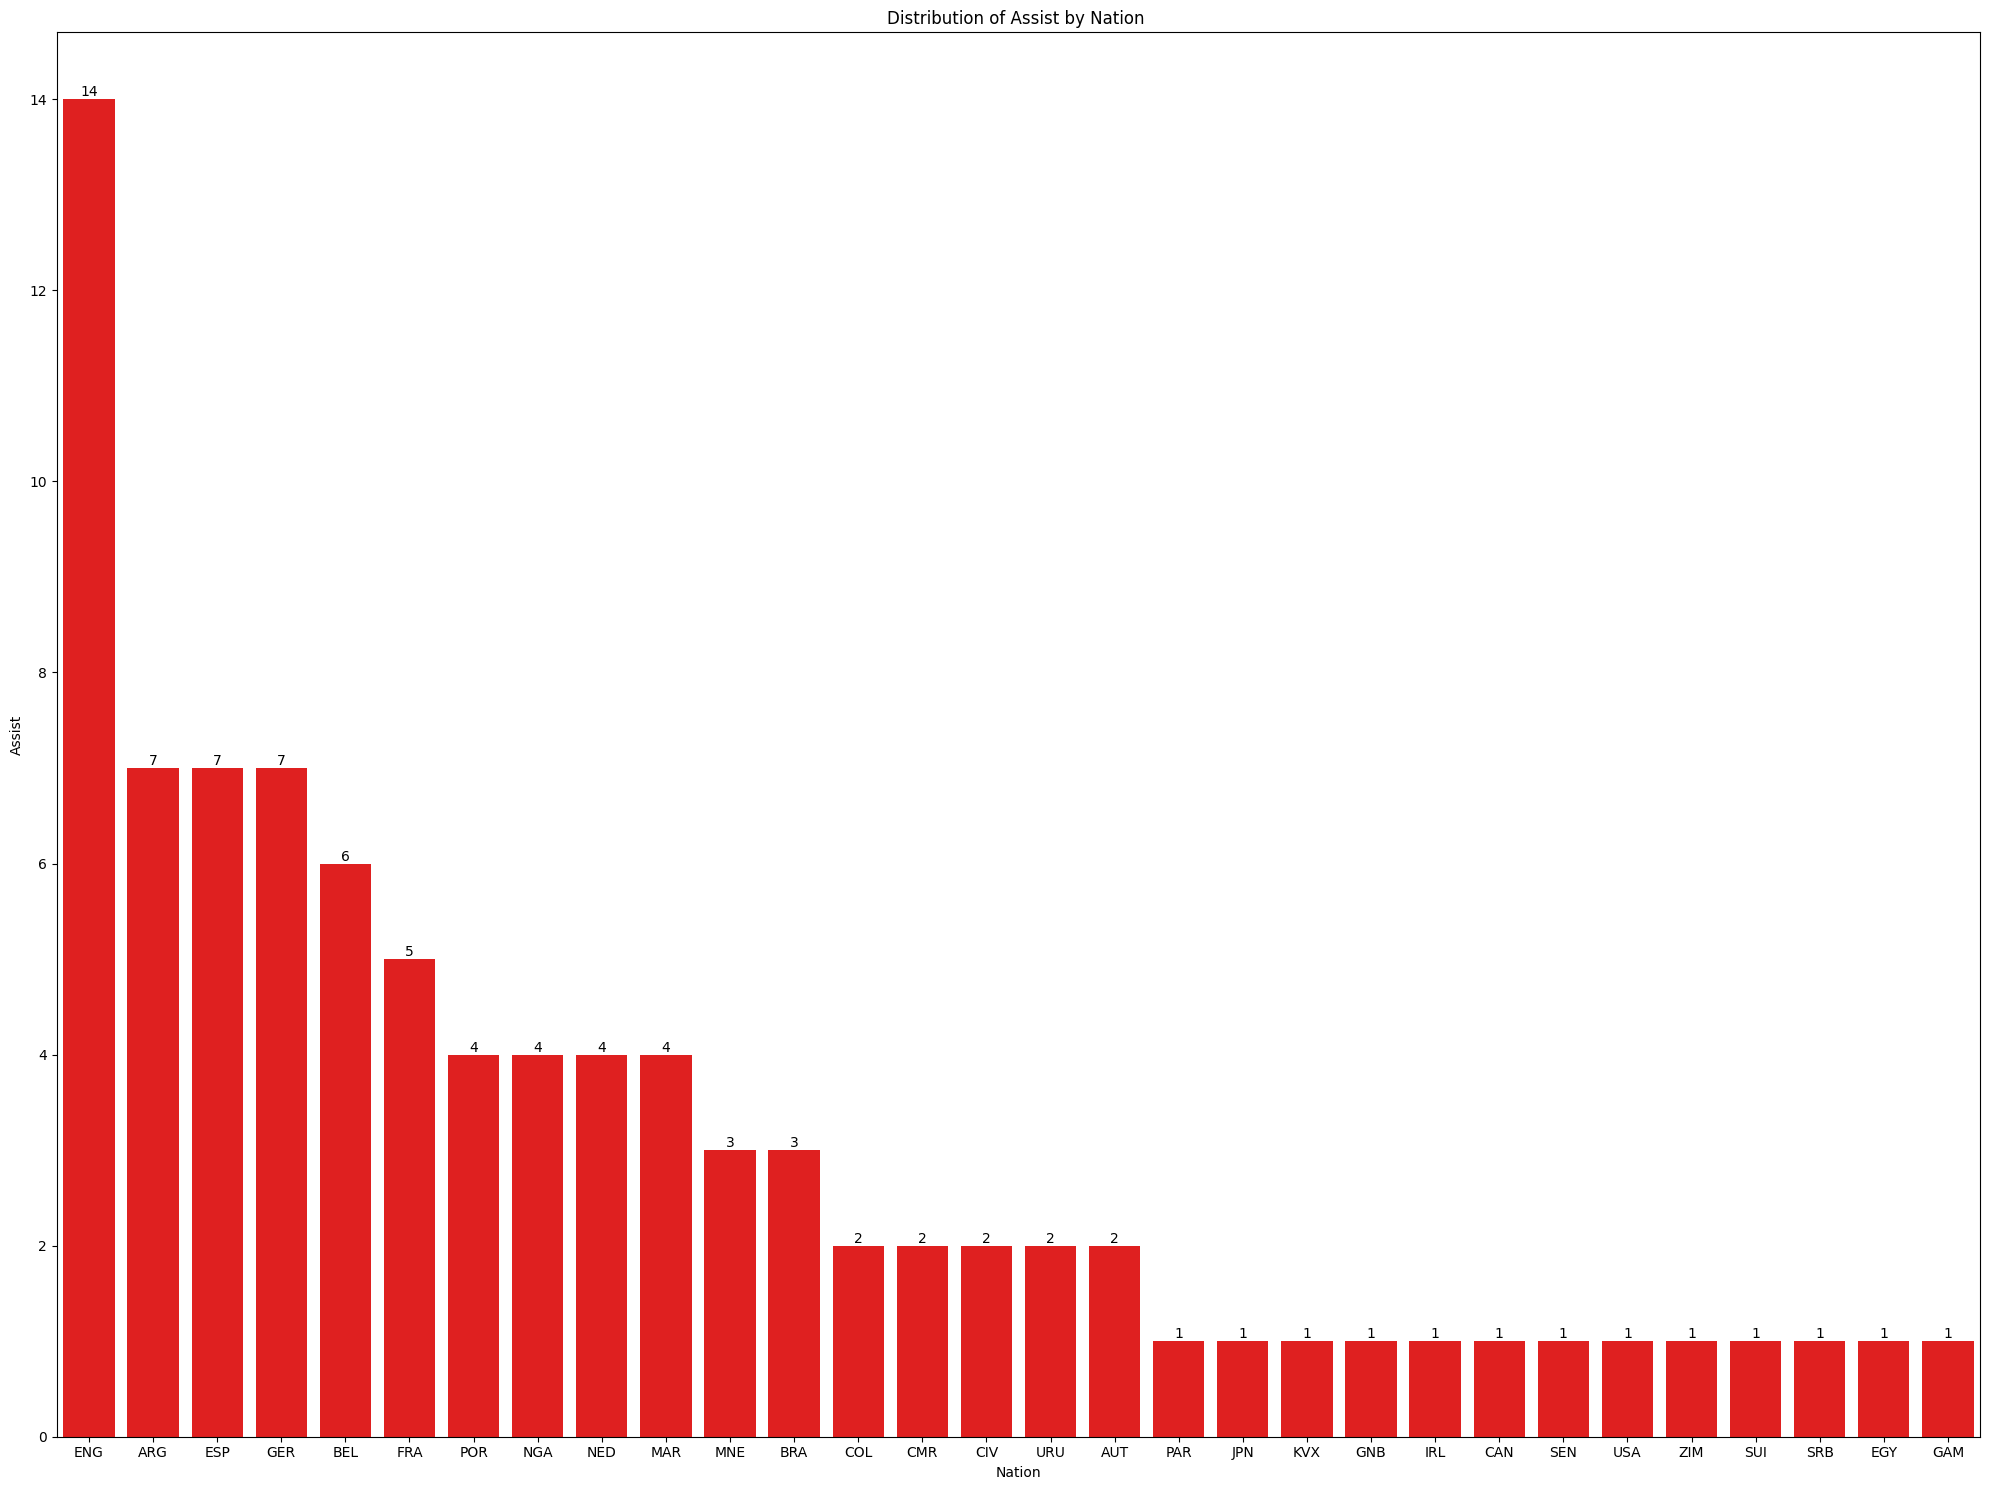

In [117]:
# Distribution of Assist by Nation
temp1=nation_data[["Nation","Assist"]].sort_values(by="Assist",ascending=False).reset_index()
temp1.drop(columns='index',inplace=True)
nation_assist=temp1[temp1["Assist"]>0]
plt.figure(figsize=(20,15))
sns.barplot(x=nation_assist["Nation"],y=nation_assist["Assist"],color='r')
for i ,v in enumerate(nation_assist["Assist"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Assist by Nation ")
plt.tight_layout()

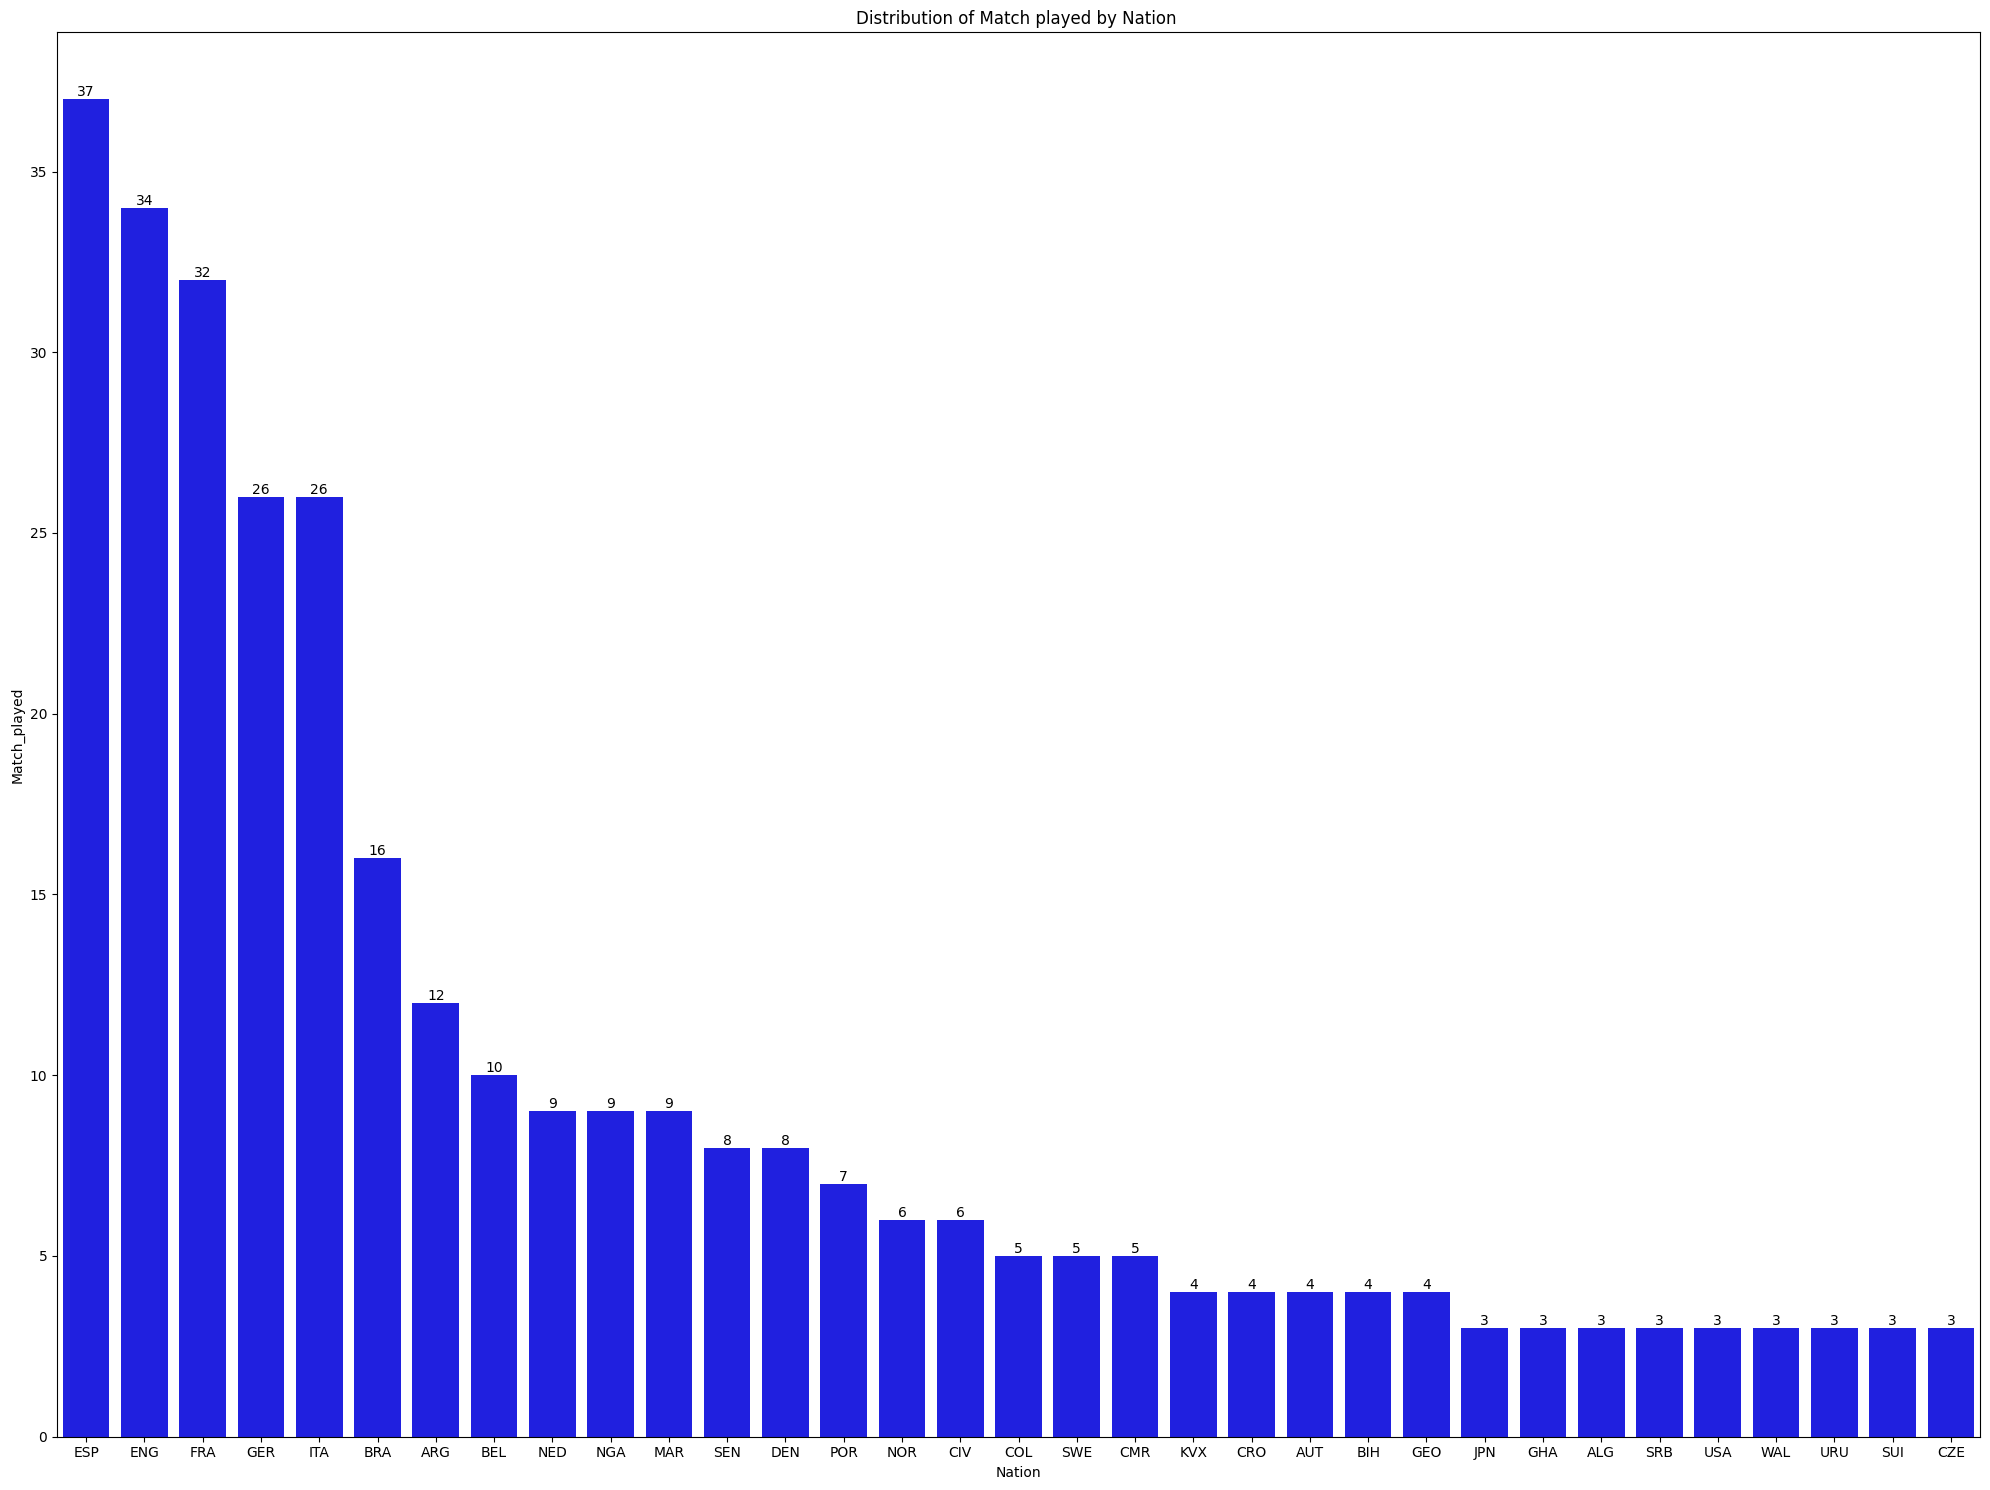

In [ ]:
# Distribution of Match played by Nation
temp2=nation_data[["Nation","Match_played"]].sort_values(by="Match_played",ascending=False).reset_index()
temp2.drop(columns='index',inplace=True)
nation_match=temp2[temp2["Match_played"]>2]
plt.figure(figsize=(20,15))
sns.barplot(x=nation_match["Nation"],y=nation_match["Match_played"],color='b')
for i ,v in enumerate(nation_match["Match_played"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Match played by Nation ")
plt.tight_layout()

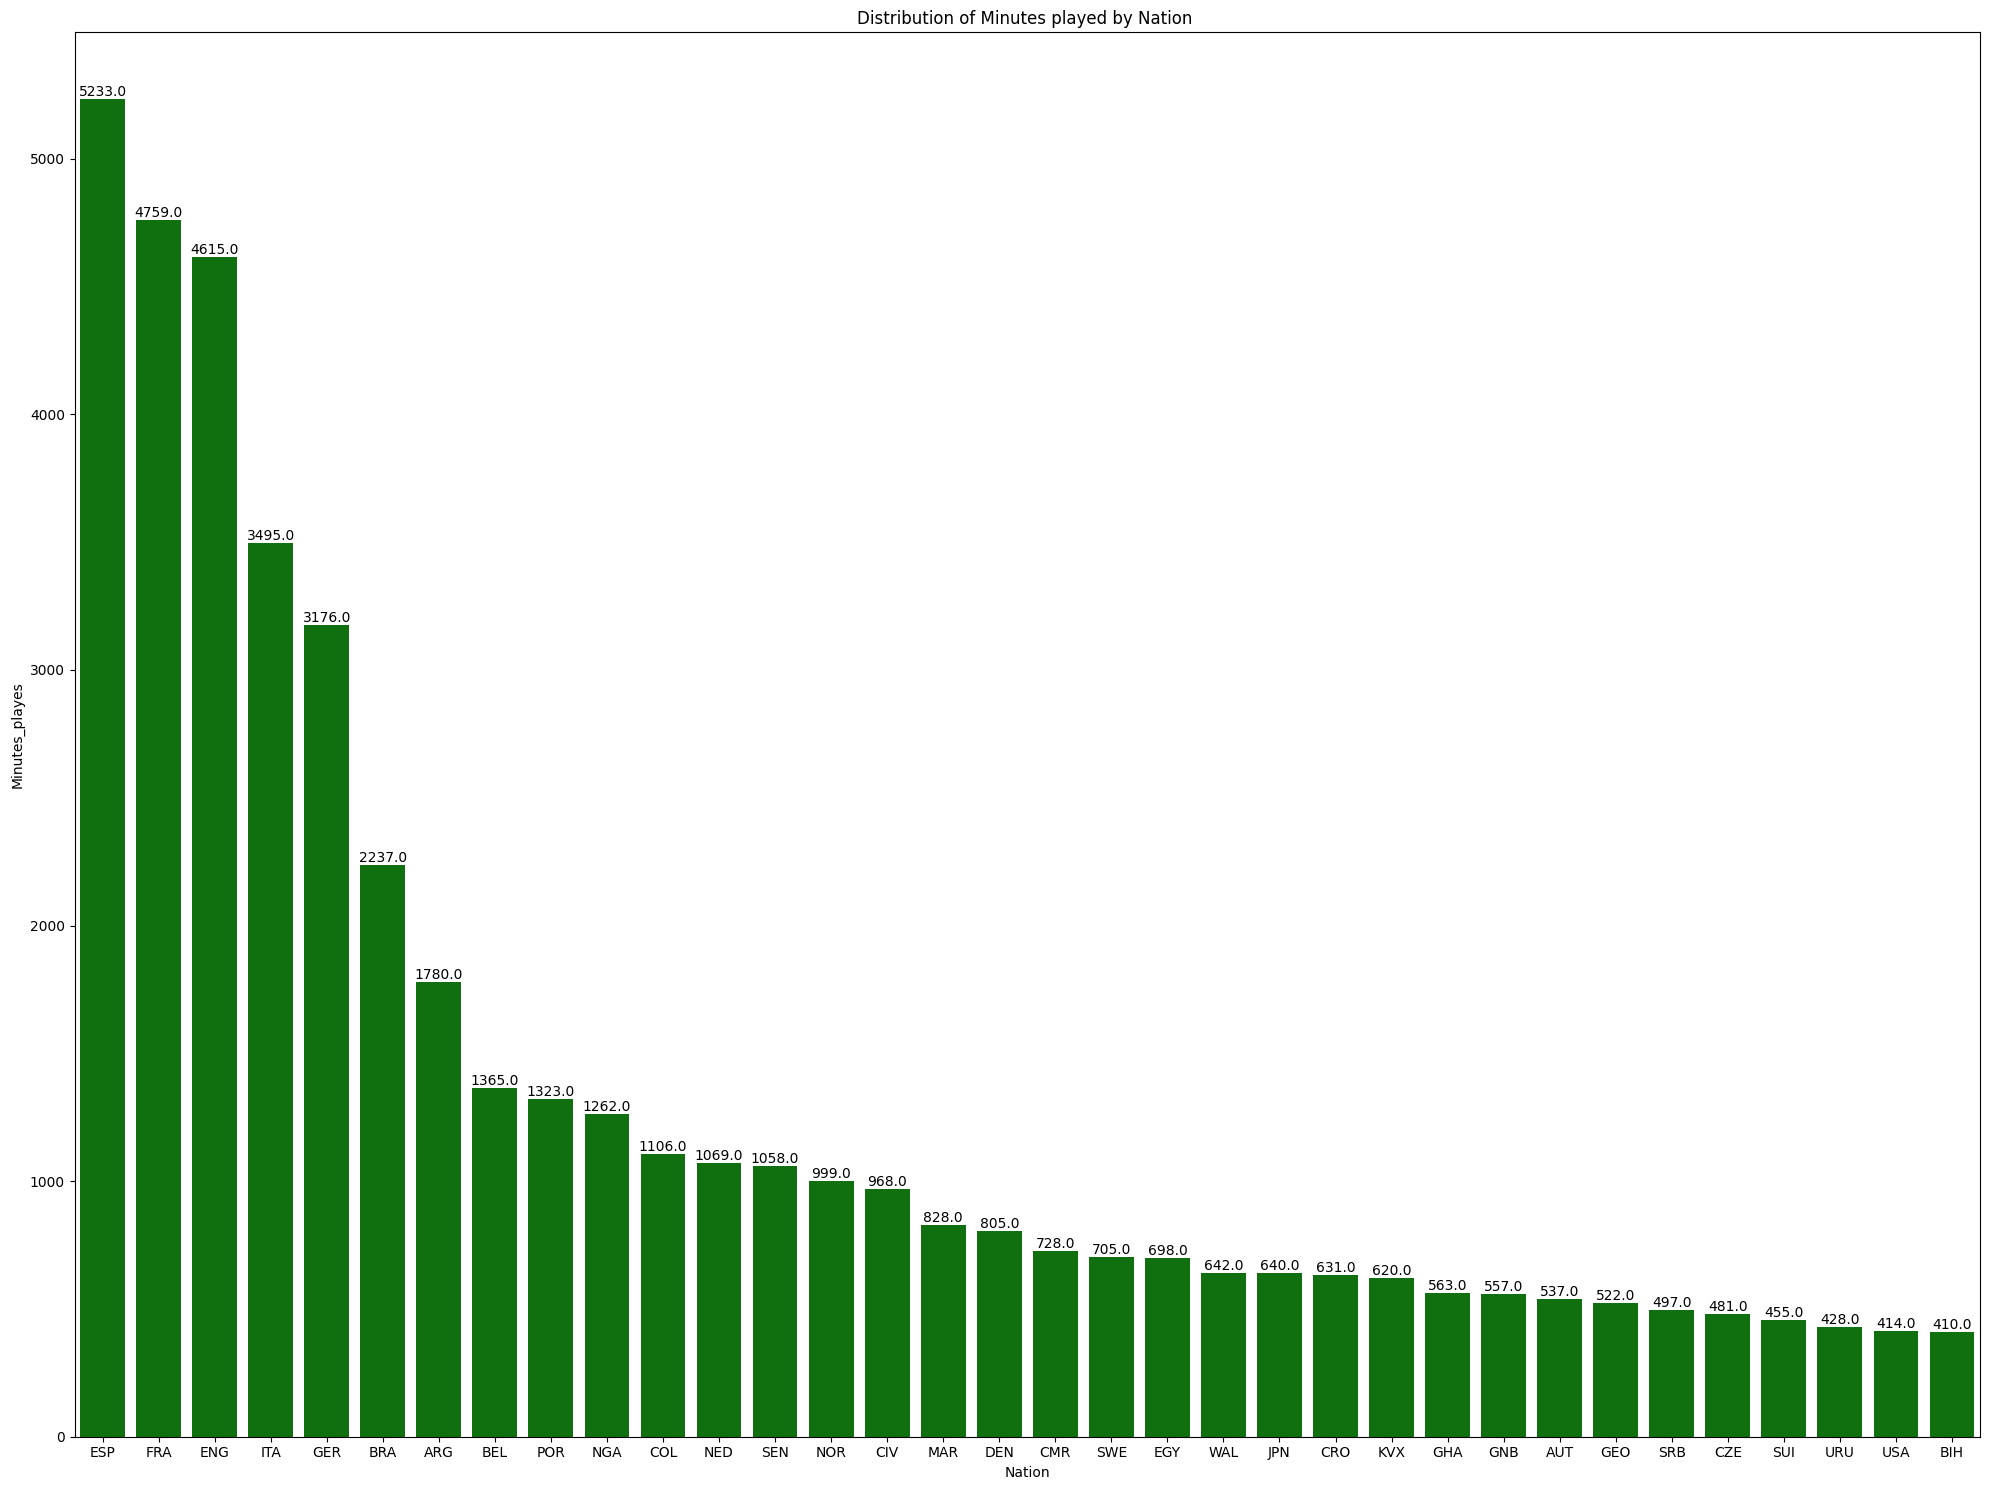

In [113]:
# Distribution of Minutes played by Nation
temp3=nation_data[["Nation","Minutes_playes"]].sort_values(by="Minutes_playes",ascending=False).reset_index()
temp3.drop(columns='index',inplace=True)
nation_minute=temp3[temp3["Minutes_playes"]>400]
plt.figure(figsize=(20,15))
sns.barplot(x=nation_minute["Nation"],y=nation_minute["Minutes_playes"],color='g')
for i ,v in enumerate(nation_minute["Minutes_playes"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Minutes played by Nation ")
plt.tight_layout()

Text(0.5, 1.0, 'Distribution Of Age By Nation')

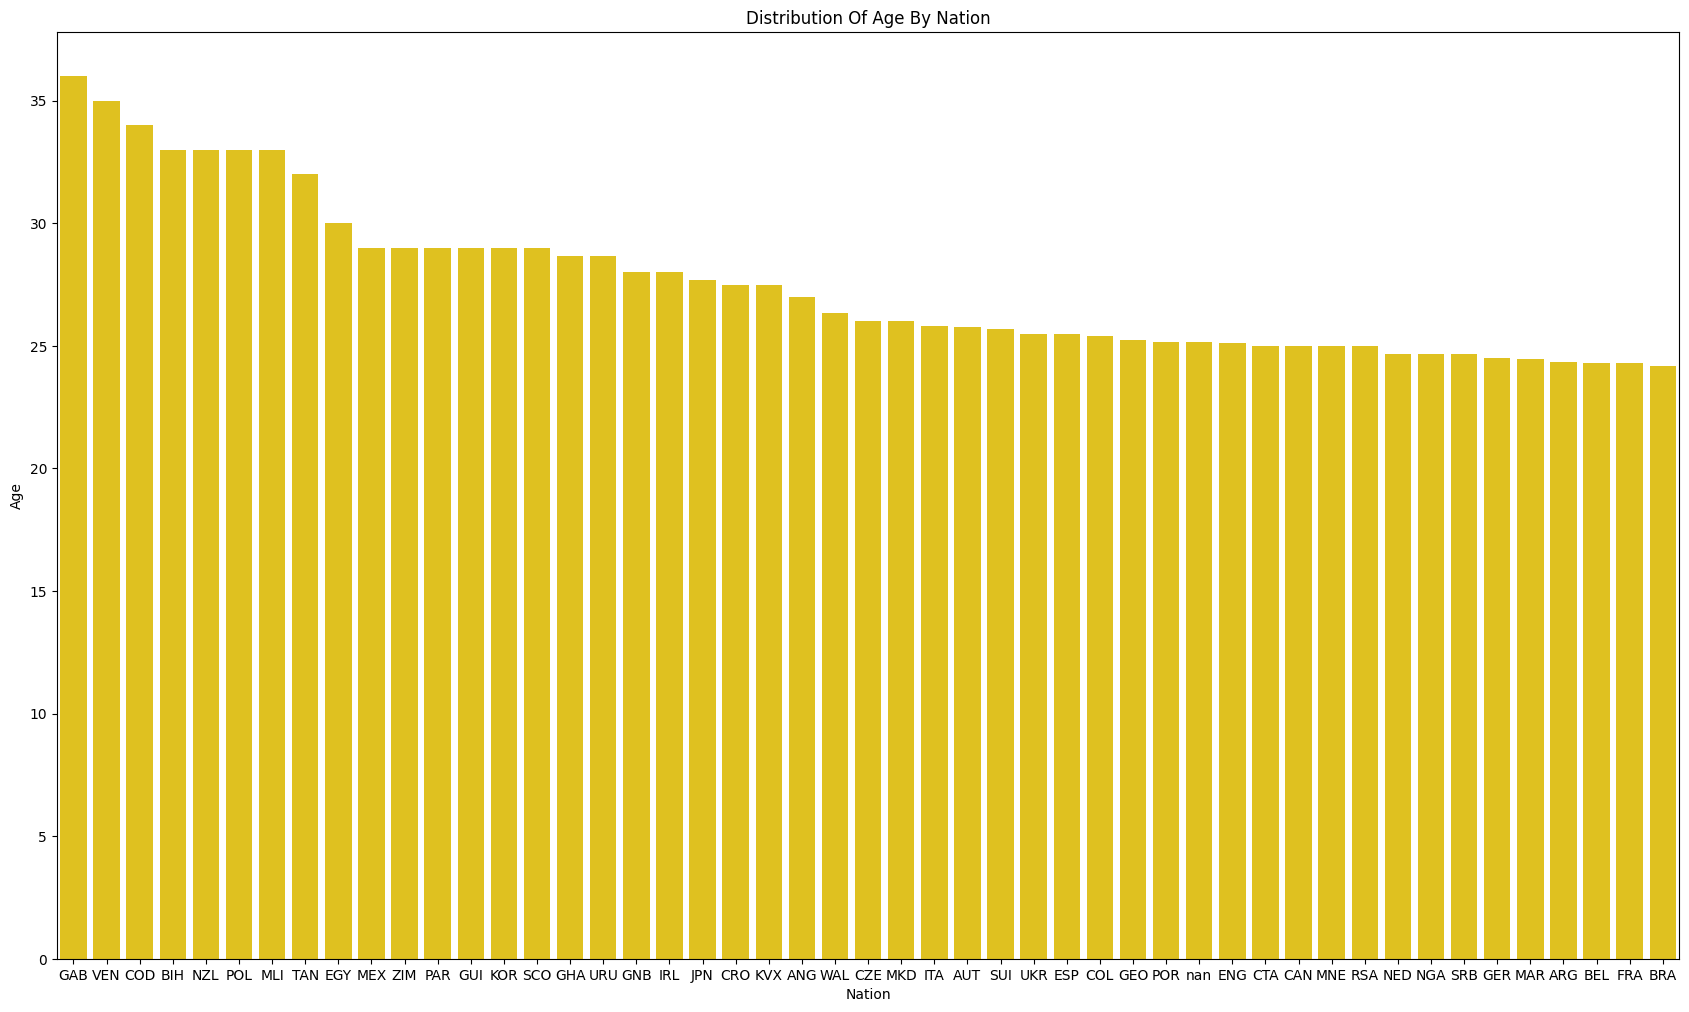

In [130]:
# "Distribution Of Age By Nation"
temp4=nation_data[["Nation","Age"]].sort_values(by="Age",ascending=False).reset_index()
temp4.drop(columns='index',inplace=True)
nation_player=temp4[temp4["Age"]>24]
plt.figure(figsize=(17,10))
sns.barplot(x=nation_player["Nation"],y=nation_player["Age"],color='gold')
plt.tight_layout()
plt.title("Distribution Of Age By Nation")

In [269]:
# Top 3 player nations
print("                                                                    Top 3 Player Nations")
print(f"The Top 3 Nations by Goals : \n 1: {nation_goals["Nation"][0]}\n 2:{nation_goals["Nation"][1]}\n 3:{nation_goals["Nation"][2]}")
print("-"*40)
print(f"The Top 3 Nations by Assists : \n 1: {nation_assist["Nation"][0]}\n 2:{nation_assist["Nation"][1]}\n 3:{nation_assist["Nation"][2]}")
print("-"*40)
print(f"The Top 3 Nations by Played Minutes : \n 1: {nation_minute["Nation"][0]}\n 2:{nation_minute["Nation"][1]}\n 3:{nation_minute["Nation"][2]}")
print("-"*40)
print(f"The Top 3 Nations by Played Matchs : \n 1: {nation_match["Nation"][0]}\n 2:{nation_match["Nation"][1]}\n 3:{nation_match["Nation"][2]}")


                                                                    Top 3 Player Nations
The Top 3 Nations by Goals : 
 1: FRA
 2:ESP
 3:ENG
----------------------------------------
The Top 3 Nations by Assists : 
 1: ENG
 2:ARG
 3:ESP
----------------------------------------
The Top 3 Nations by Played Minutes : 
 1: ESP
 2:FRA
 3:ENG
----------------------------------------
The Top 3 Nations by Played Matchs : 
 1: ESP
 2:ENG
 3:FRA


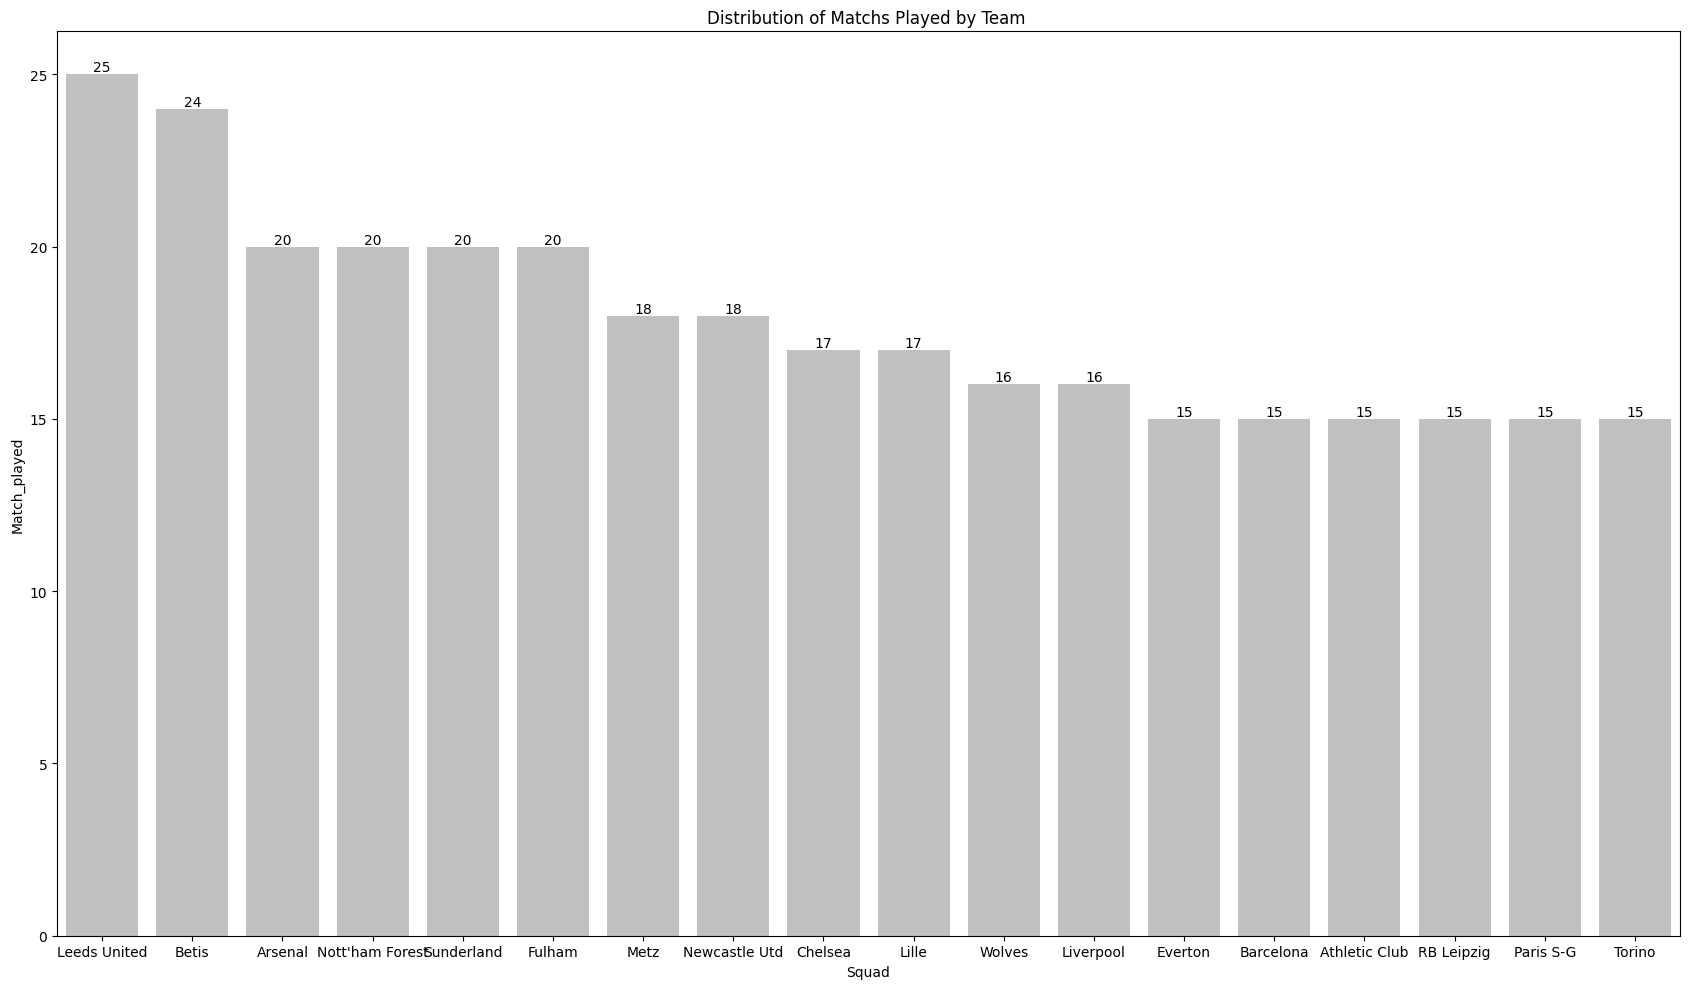

In [132]:
# Distribution of Matchs Played by Team 
temp6=Team_data[["Squad","Match_played"]].sort_values(by="Match_played",ascending=False).reset_index()
temp6.drop(columns='index',inplace=True)
Match_team=temp6[temp6["Match_played"]>=15]
plt.figure(figsize=(17,10))
sns.barplot(x=Match_team["Squad"],y=Match_team["Match_played"],color='silver')
for i,v in enumerate(Match_team["Match_played"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Matchs Played by Team ")
plt.tight_layout()



Text(0.5, 1.0, 'Distibution of Goals by Team ')

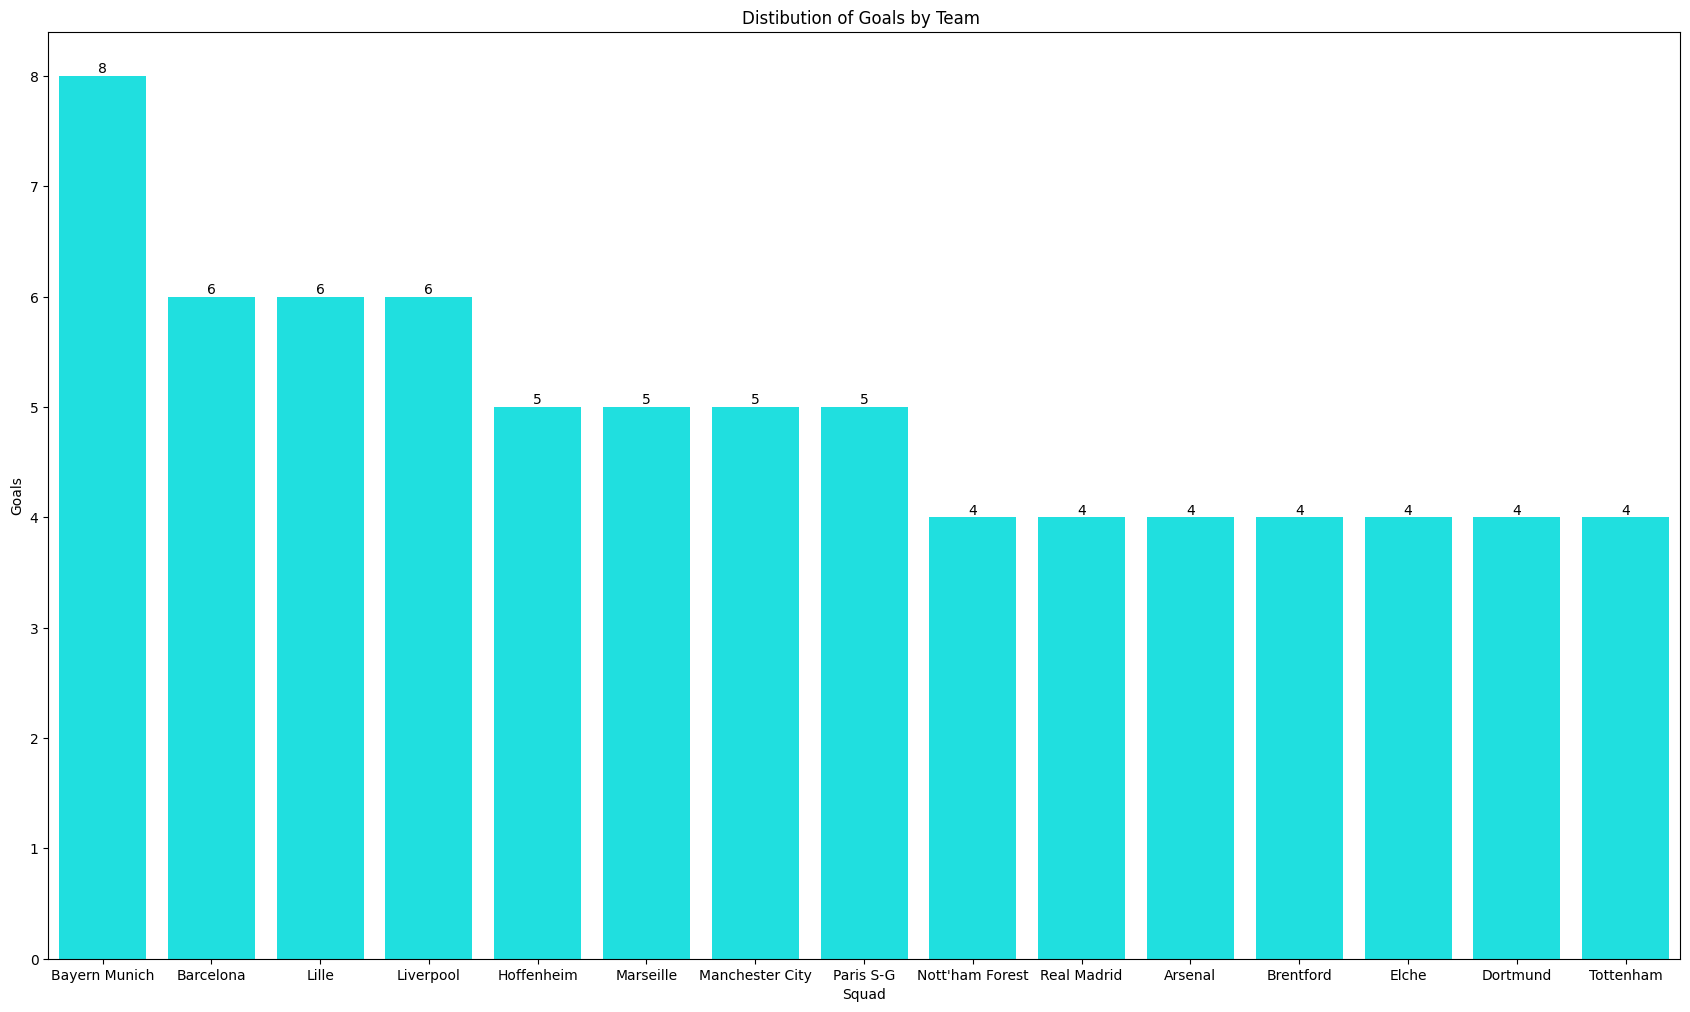

In [105]:
# Distibution of Goals by Team 
temp7=Team_data[["Squad","Goals"]].sort_values(by="Goals",ascending=False).reset_index()
temp7.drop(columns='index',inplace=True)
Goals_team=temp7[temp7["Goals"]>3]
plt.figure(figsize=(17,10))
sns.barplot(x=Goals_team["Squad"],y=Goals_team["Goals"],color='cyan')
plt.tight_layout()
for i,v in enumerate(Goals_team["Goals"]):  
    plt.text(i, v + 0, str(v), ha='center', va='bottom')
plt.title("Distibution of Goals by Team ")


Text(0.5, 1.0, 'Distribution of Assist by Team')

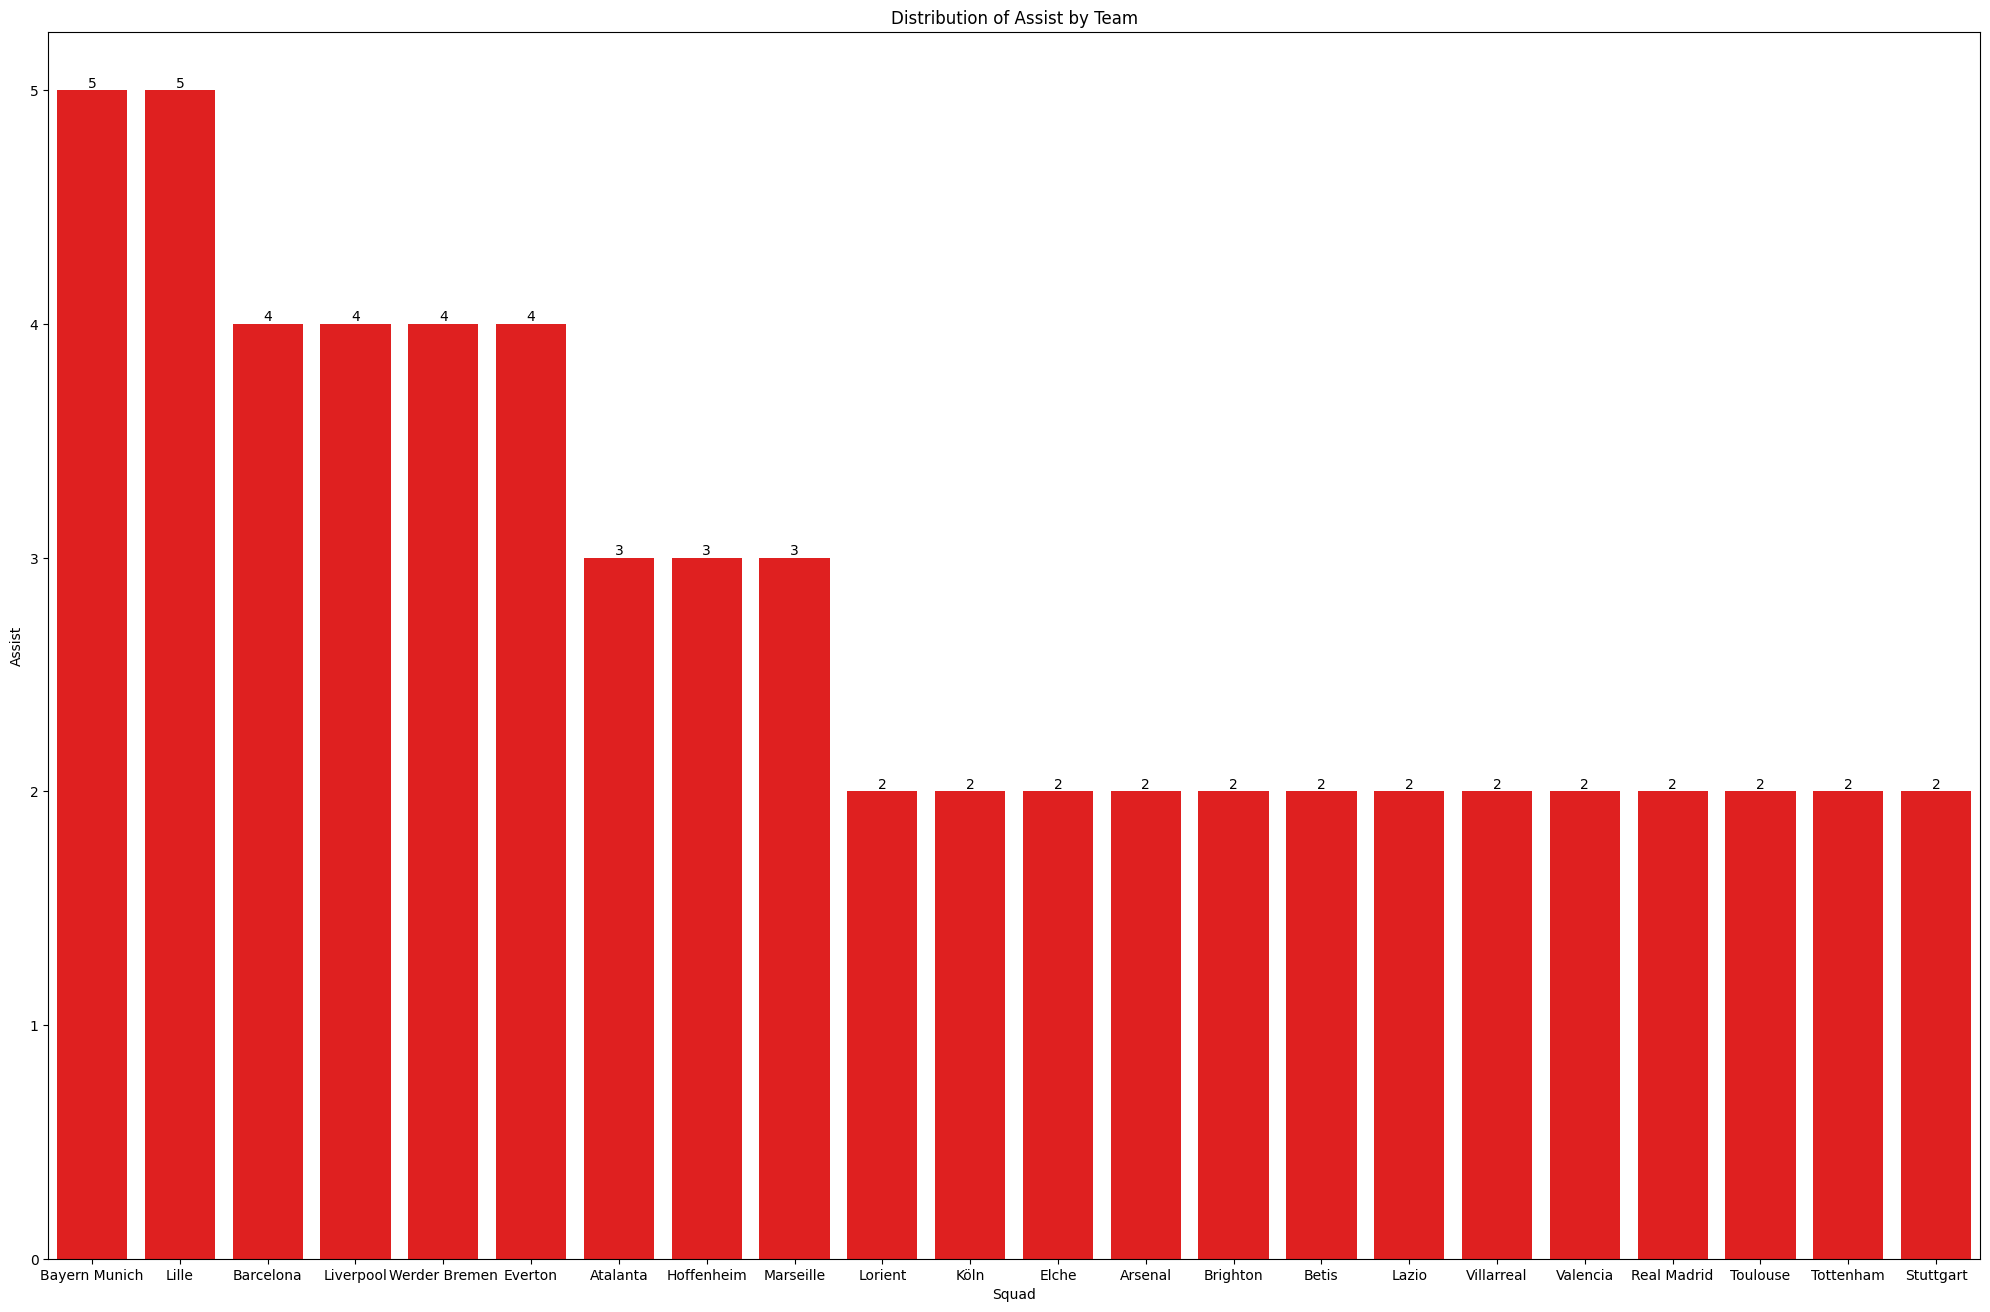

In [143]:
# Distribution of Assist by Team
temp8=Team_data[["Squad","Assist"]].sort_values(by='Assist',ascending=False).reset_index()
temp8.drop(columns='index',inplace=True)
team_assist=temp8[temp8["Assist"]>1]
plt.figure(figsize=(20,13))
sns.barplot(x=team_assist["Squad"],y=team_assist["Assist"],color='r')
for i,v in enumerate(team_assist["Assist"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Assist by Team")

Text(0.5, 1.0, 'Distribution of Minute Played by Team')

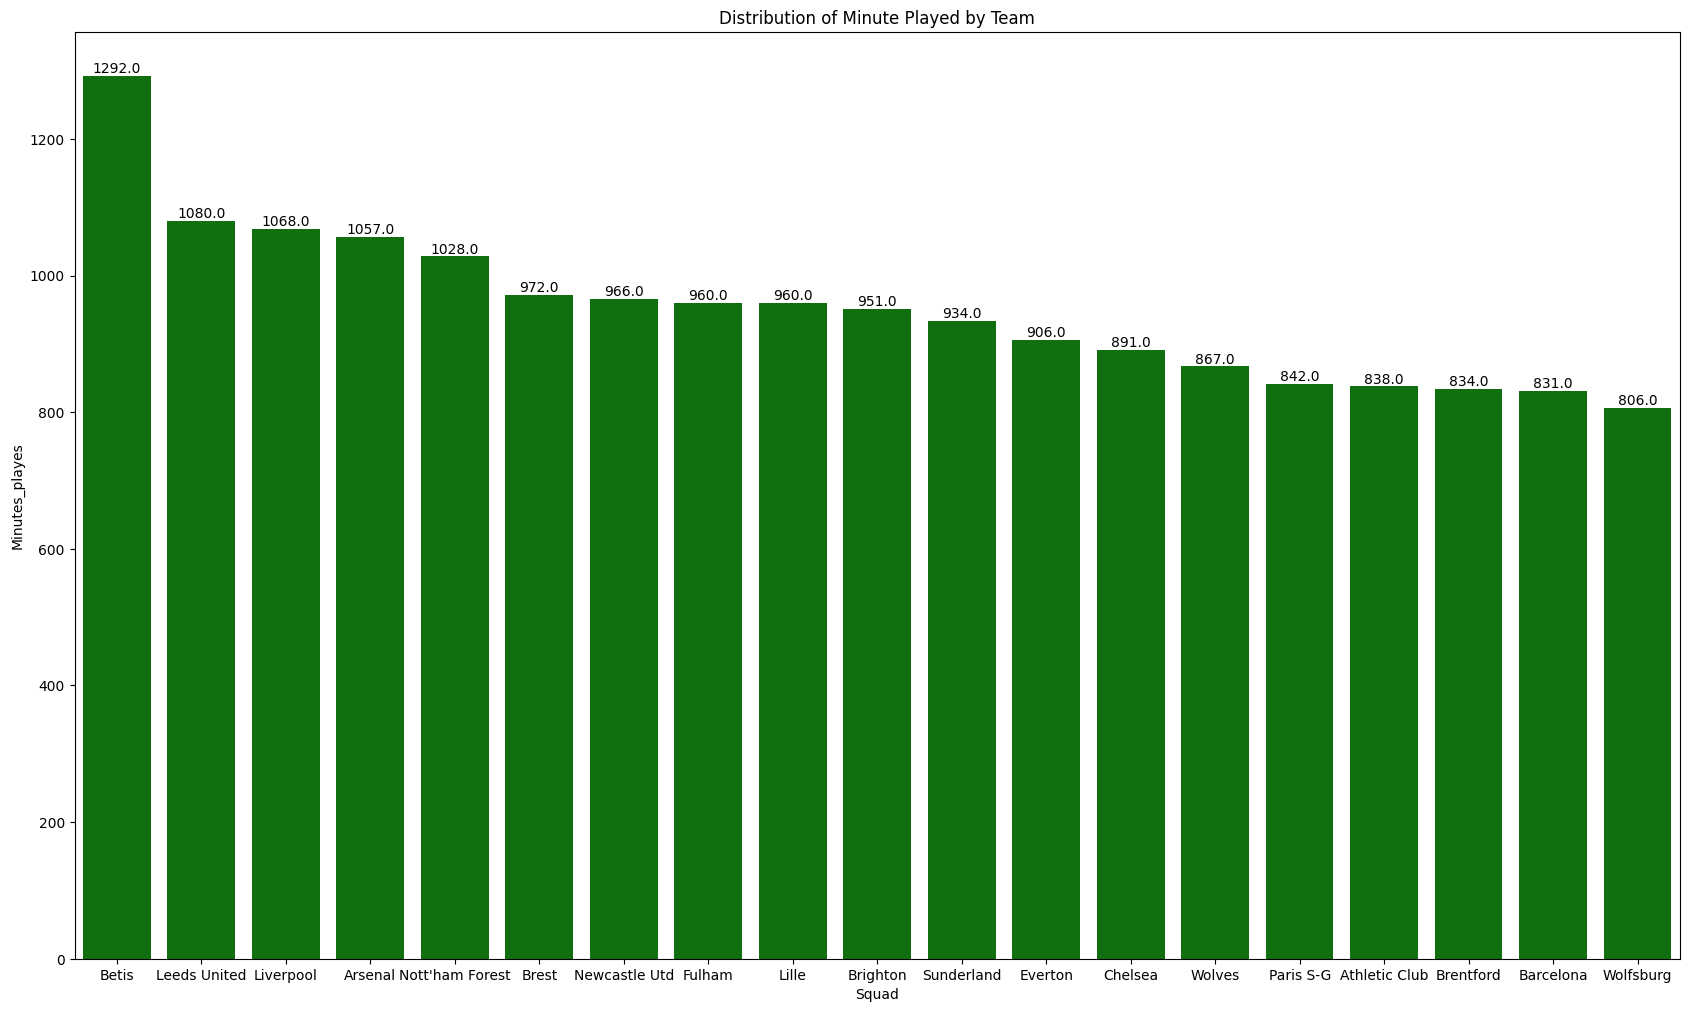

In [131]:
# Distribution of Minute Played by Team
temp9=Team_data[["Squad","Minutes_playes"]].sort_values(by='Minutes_playes',ascending=False).reset_index()
temp9.drop(columns='index',inplace=True)
team_minute=temp9[temp9["Minutes_playes"]>800]
plt.figure(figsize=(17,10))
sns.barplot(x=team_minute["Squad"],y=team_minute["Minutes_playes"],color='g')
for i,v in enumerate(team_minute["Minutes_playes"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Minute Played by Team")

Text(0.5, 1.0, 'Distribution of Goals_exp_pen by Team')

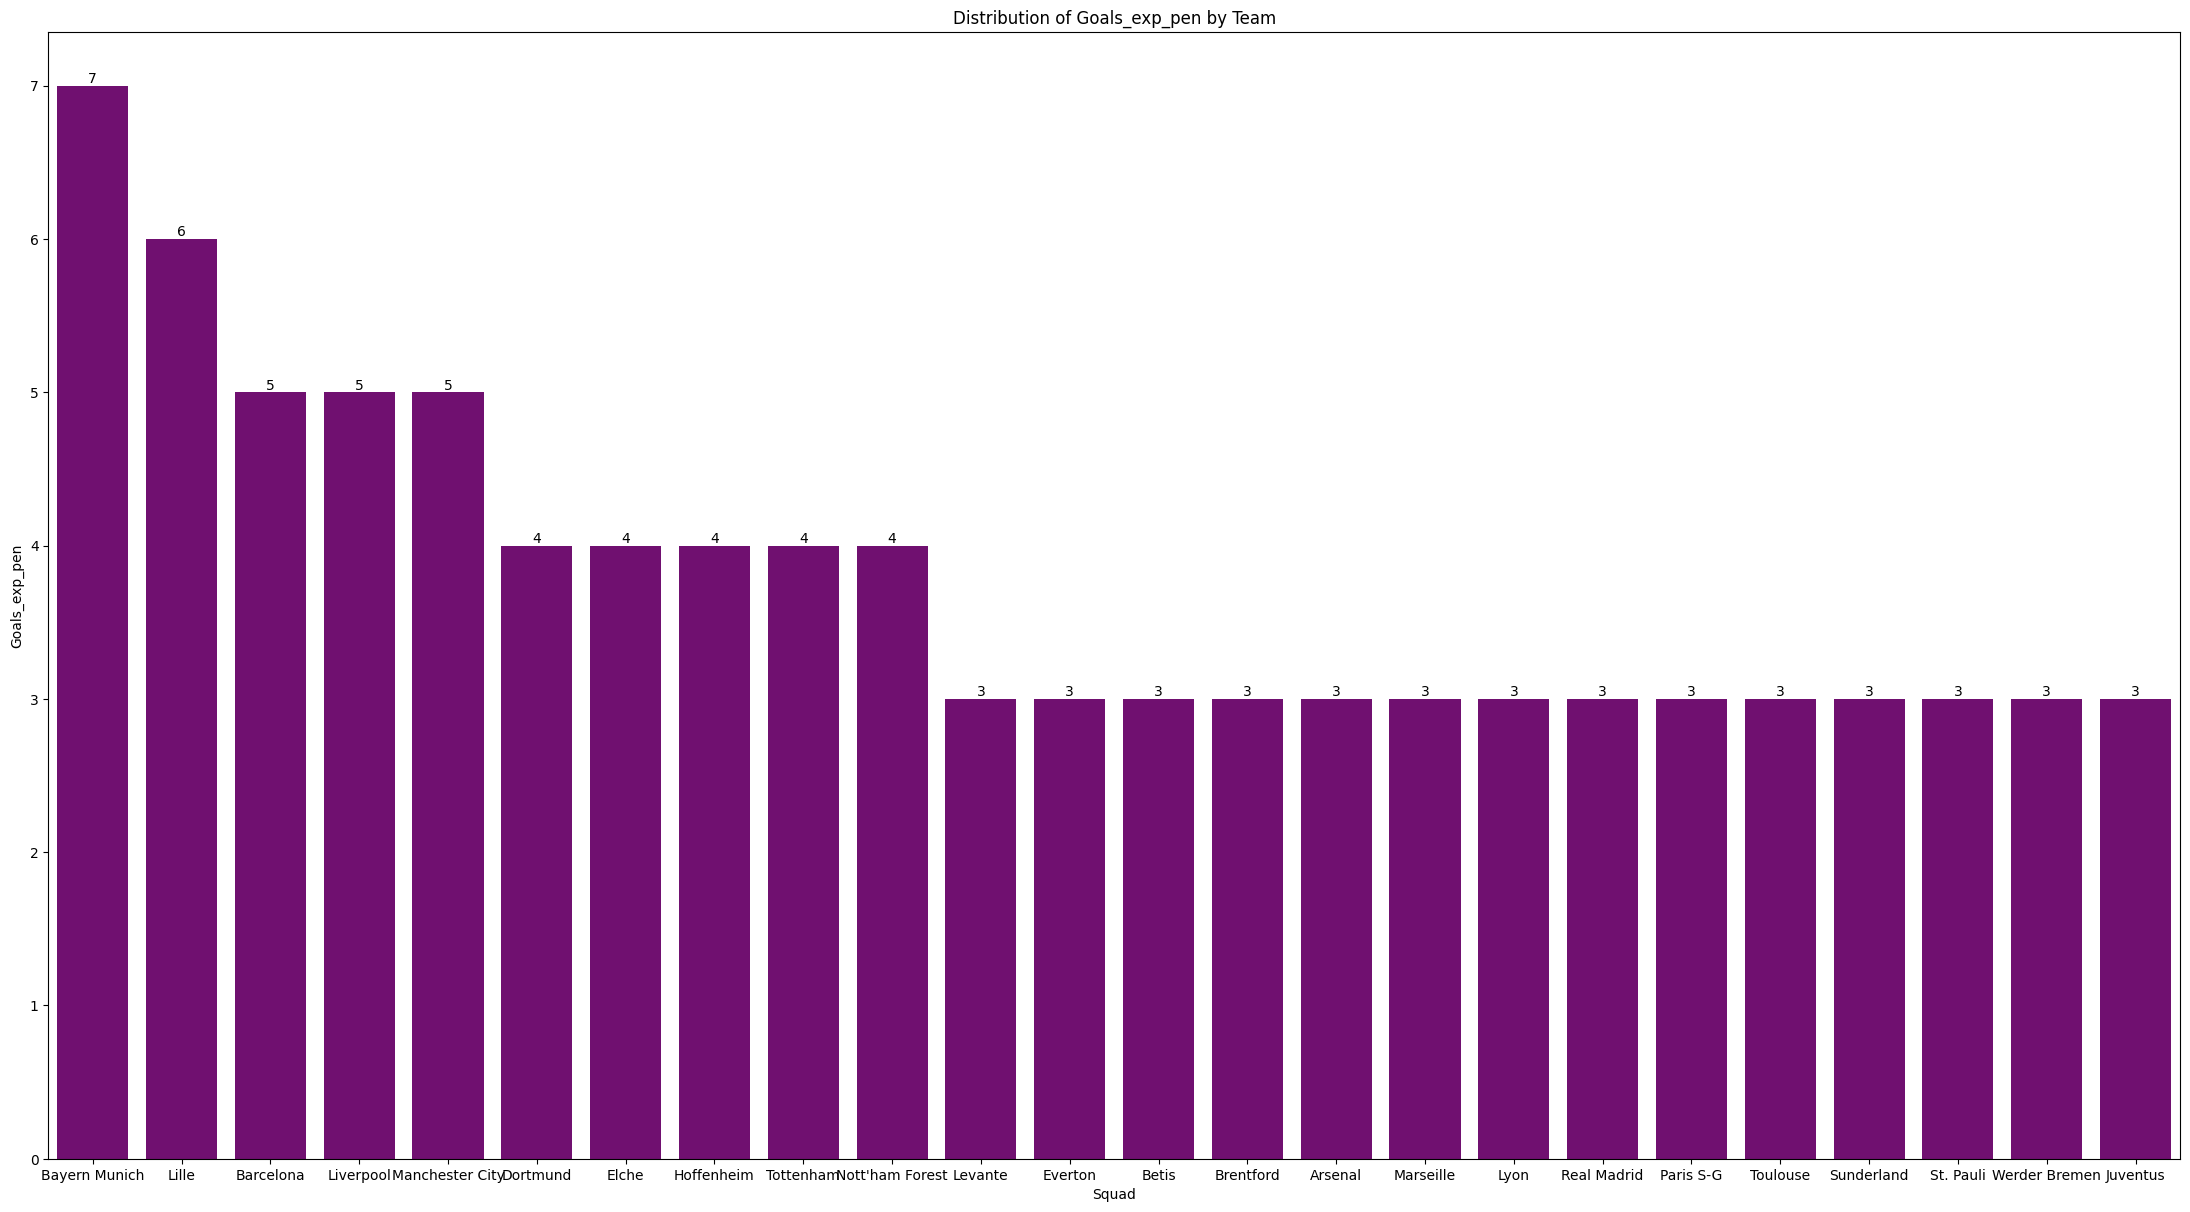

In [222]:
# Distribution of Goals_exp_pen by Team
temp9=Team_data[["Squad","Goals_exp_pen"]].sort_values(by='Goals_exp_pen',ascending=False).reset_index()
temp9.drop(columns='index',inplace=True)
team_pen=temp9[temp9["Goals_exp_pen"]>=3]
plt.figure(figsize=(22,12))
sns.barplot(x=team_pen["Squad"],y=team_pen["Goals_exp_pen"],color='purple')
for i,v in enumerate(team_pen["Goals_exp_pen"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Goals_exp_pen by Team")

Text(0.5, 1.0, 'Distribution of Age by Team')

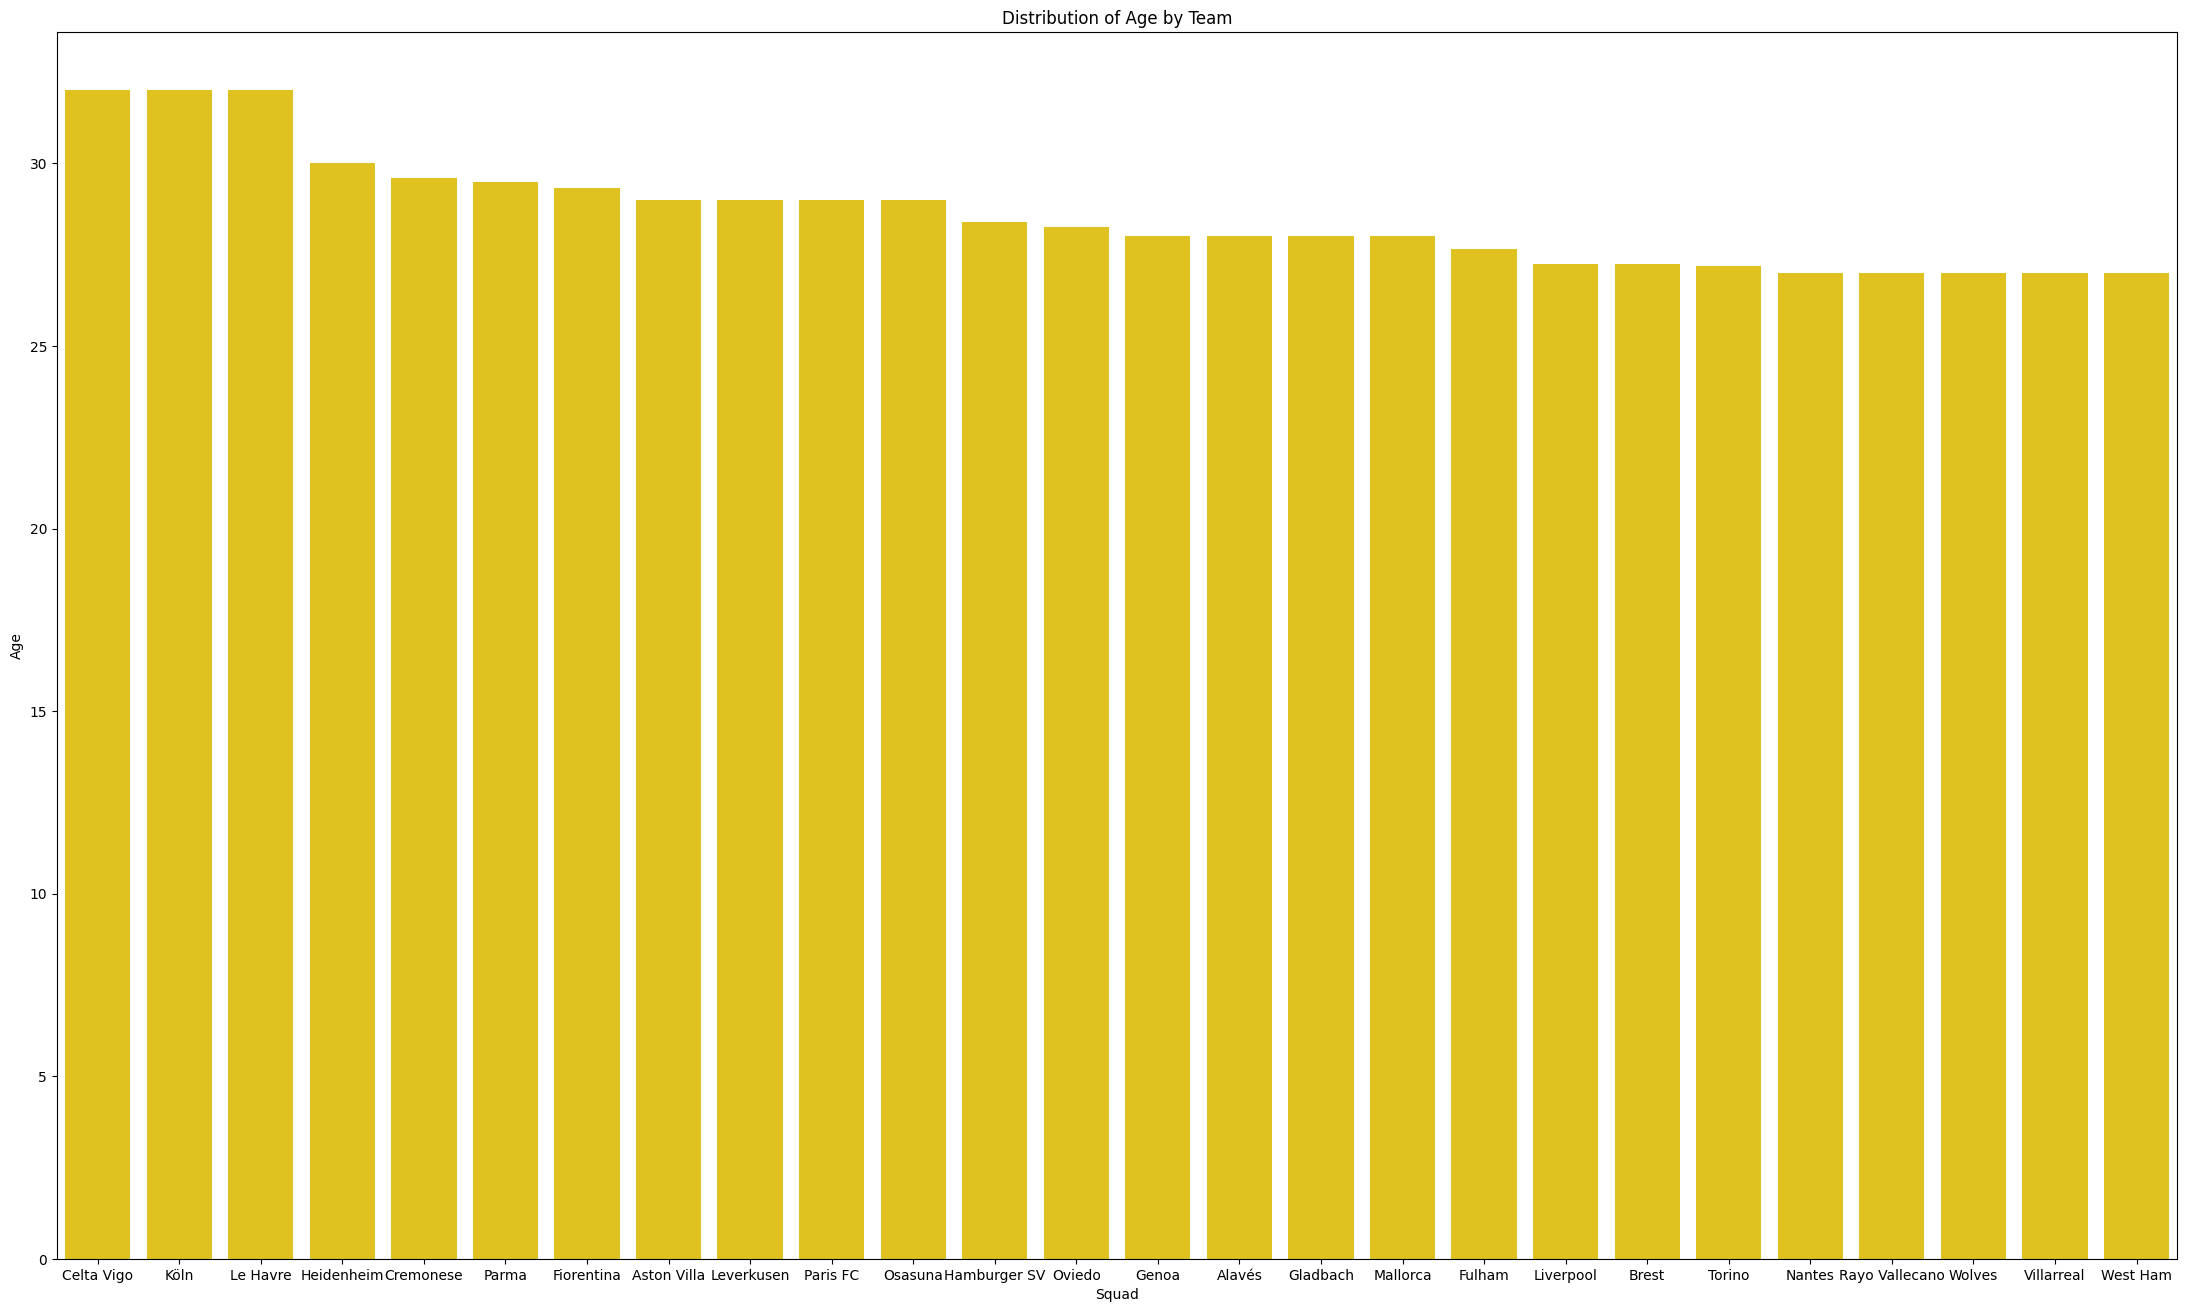

In [140]:
# Distribution of Age by Team
temp10=Team_data[["Squad","Age"]].sort_values(by='Age',ascending=False).reset_index()
temp10.drop(columns='index',inplace=True)
team_age=temp10[temp10["Age"]>=27]
plt.figure(figsize=(22,13))
sns.barplot(x=team_age["Squad"],y=team_age["Age"],color='gold')
plt.tight_layout()
plt.title("Distribution of Age by Team")

In [276]:
# Top 3 Teams
print(f"The Top 3 Teams by Goals : \n 1: {Goals_team["Squad"][0]} \n 2: {Goals_team["Squad"][1]} \n 3: {Goals_team["Squad"][2]}")
print("-"*40)
print(f"The Top 3 Teams by Assists : \n 1: {team_assist["Squad"][0]} \n 2: {team_assist["Squad"][1]} \n 3: {team_assist["Squad"][2]}")
print("-"*40)
print(f"The Top 3 Teams by Played Minutes : \n 1: {team_minute["Squad"][0]} \n 2: {team_minute["Squad"][1]} \n 3: {team_minute["Squad"][2]}")
print("-"*40)
print(f"The Top 3 Teams by Played Matches : \n 1: {Match_team["Squad"][0]} \n 2: {Match_team["Squad"][1]} \n 3: {Match_team["Squad"][2]}")
print("-"*40)
print(f"The Top 3 Teams by Played Minutes : \n 1: {team_pen["Squad"][0]} \n 2: {team_pen["Squad"][1]} \n 3: {team_pen["Squad"][2]}")


The Top 3 Teams by Goals : 
 1: Bayern Munich 
 2: Barcelona 
 3: Lille
----------------------------------------
The Top 3 Teams by Assists : 
 1: Bayern Munich 
 2: Lille 
 3: Barcelona
----------------------------------------
The Top 3 Teams by Played Minutes : 
 1: Betis 
 2: Leeds United 
 3: Liverpool
----------------------------------------
The Top 3 Teams by Played Matches : 
 1: Leeds United 
 2: Betis 
 3: Arsenal
----------------------------------------
The Top 3 Teams by Played Minutes : 
 1: Bayern Munich 
 2: Lille 
 3: Barcelona


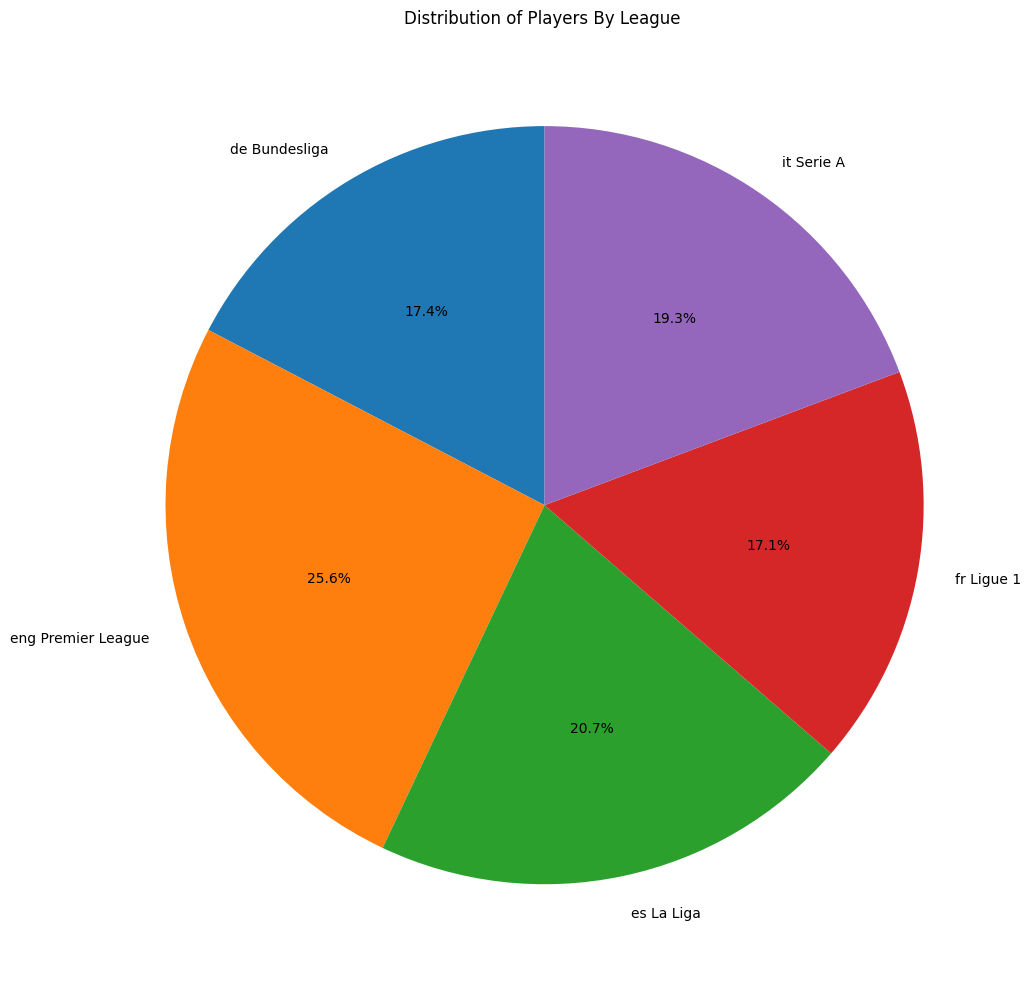

In [207]:
# Distribution of Players By League 
pourcentage=[(i*100)/total for i in Ligue_data["Players"]]
plt.figure(figsize=(17,10))
plt.pie(pourcentage,labels=Ligue_data["Comp"],autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Players By League ")
plt.tight_layout()

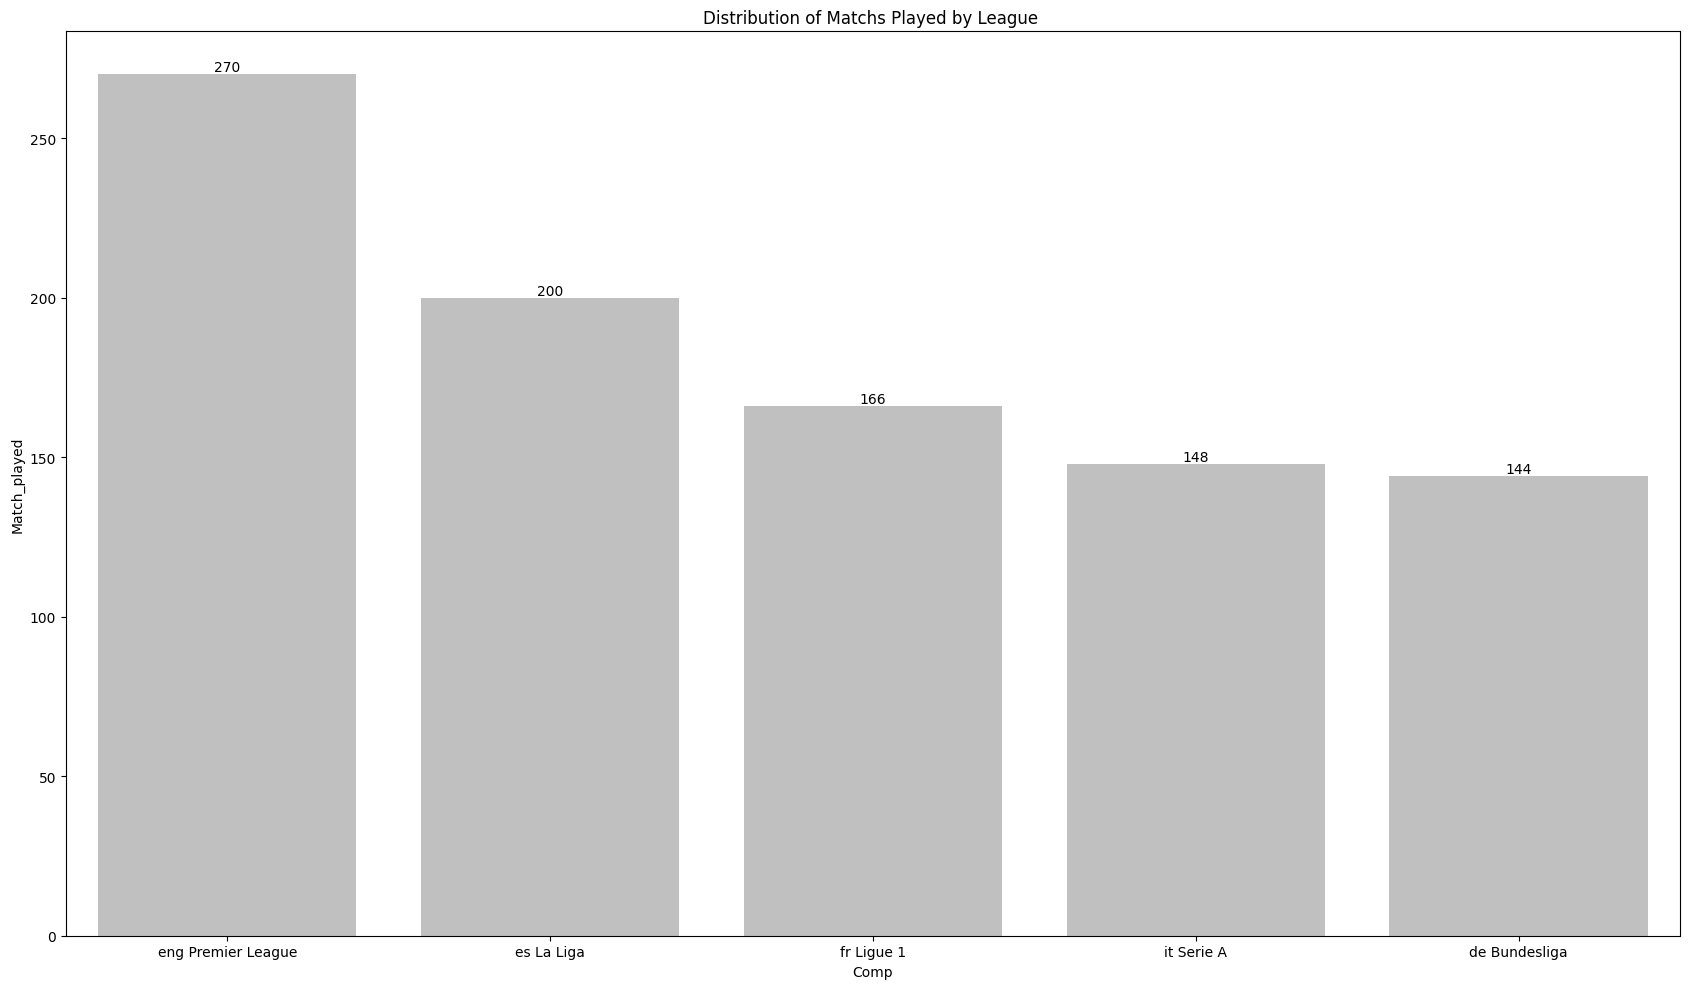

In [209]:
# Distribution of Matchs Played by League
Match_league=Ligue_data[["Comp","Match_played"]].sort_values(by="Match_played",ascending=False).reset_index()
Match_league.drop(columns='index',inplace=True)
plt.figure(figsize=(17,10))
sns.barplot(x=Match_league["Comp"],y=Match_league["Match_played"],color='silver')
for i,v in enumerate(Match_league["Match_played"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Distribution of Matchs Played by League ")
plt.tight_layout()

Text(0.5, 1.0, 'Distibution of Goals by League  ')

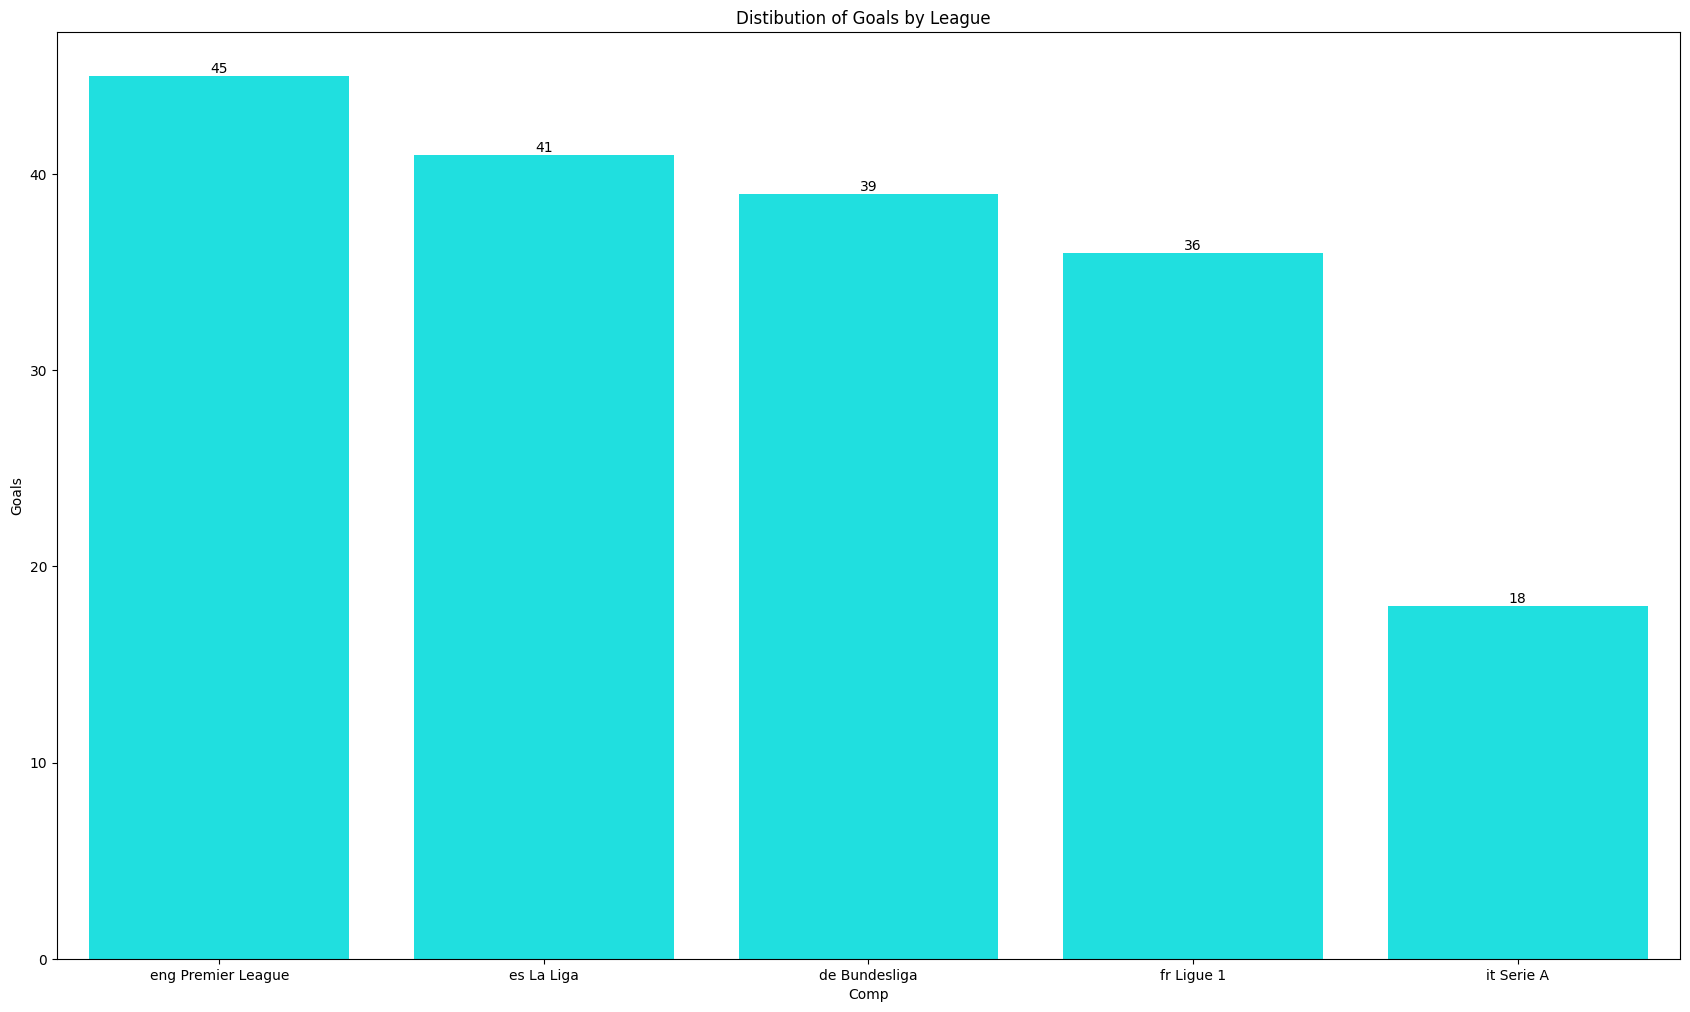

In [210]:
# Distibution of Goals by League 
Goals_ligue=Ligue_data[["Comp","Goals"]].sort_values(by="Goals",ascending=False).reset_index()
Goals_ligue.drop(columns='index',inplace=True)
plt.figure(figsize=(17,10))
sns.barplot(x=Goals_ligue["Comp"],y=Goals_ligue["Goals"],color='cyan')
plt.tight_layout()
for i,v in enumerate(Goals_ligue["Goals"]):  
    plt.text(i, v + 0, str(v), ha='center', va='bottom')
plt.title("Distibution of Goals by League  ")

Text(0.5, 1.0, 'Distribution of Assist by League')

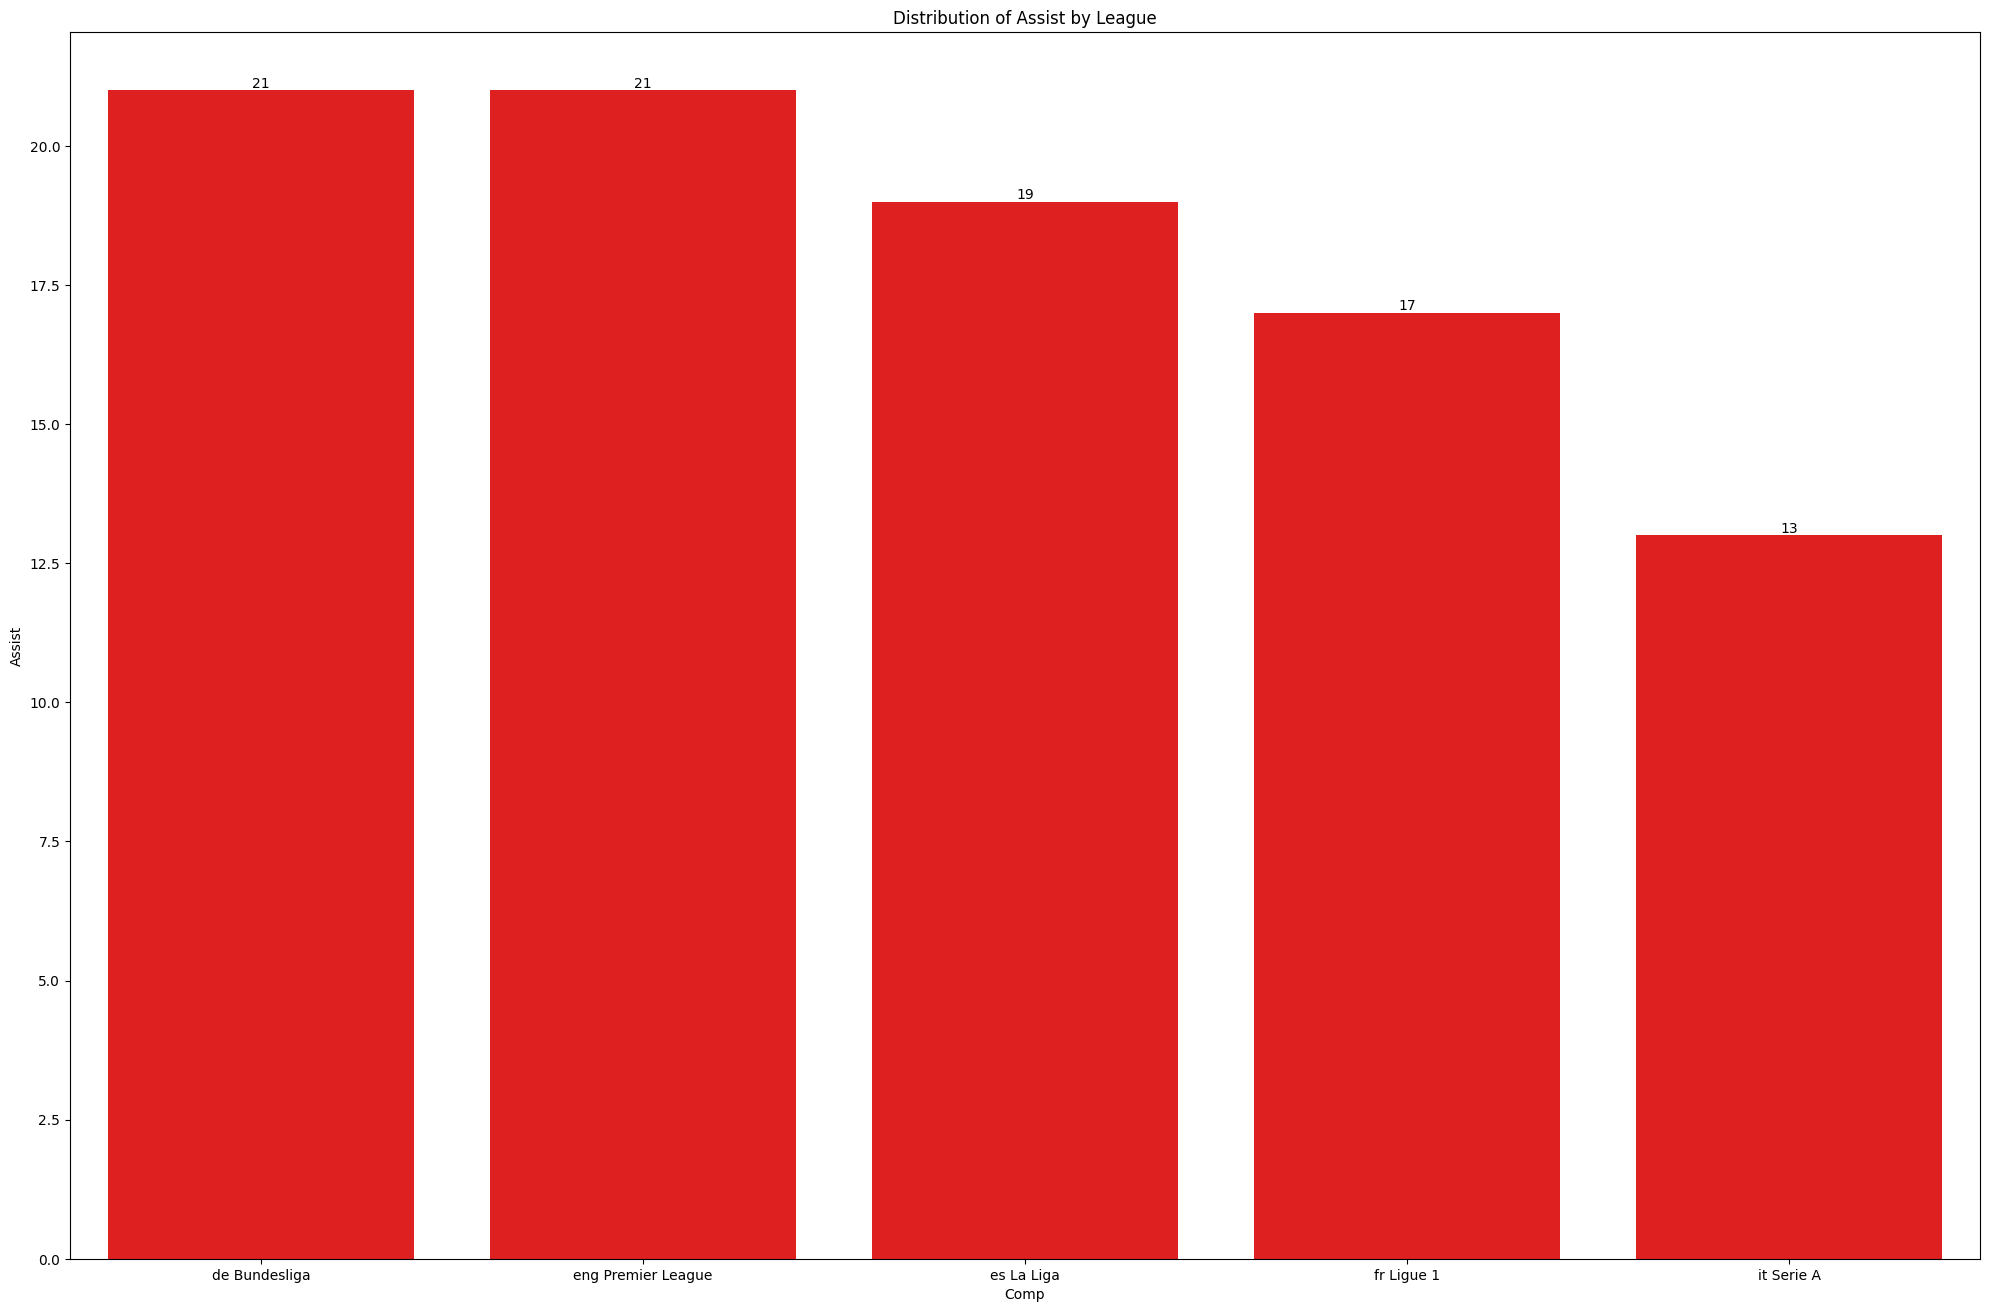

In [213]:
# Distribution of Assist by League
ligue_assist=Ligue_data[["Comp","Assist"]].sort_values(by='Assist',ascending=False).reset_index()
ligue_assist.drop(columns='index',inplace=True)
plt.figure(figsize=(20,13))
sns.barplot(x=ligue_assist["Comp"],y=ligue_assist["Assist"],color='r')
for i,v in enumerate(ligue_assist["Assist"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Assist by League")

Text(0.5, 1.0, 'Distribution of Minute Played by League')

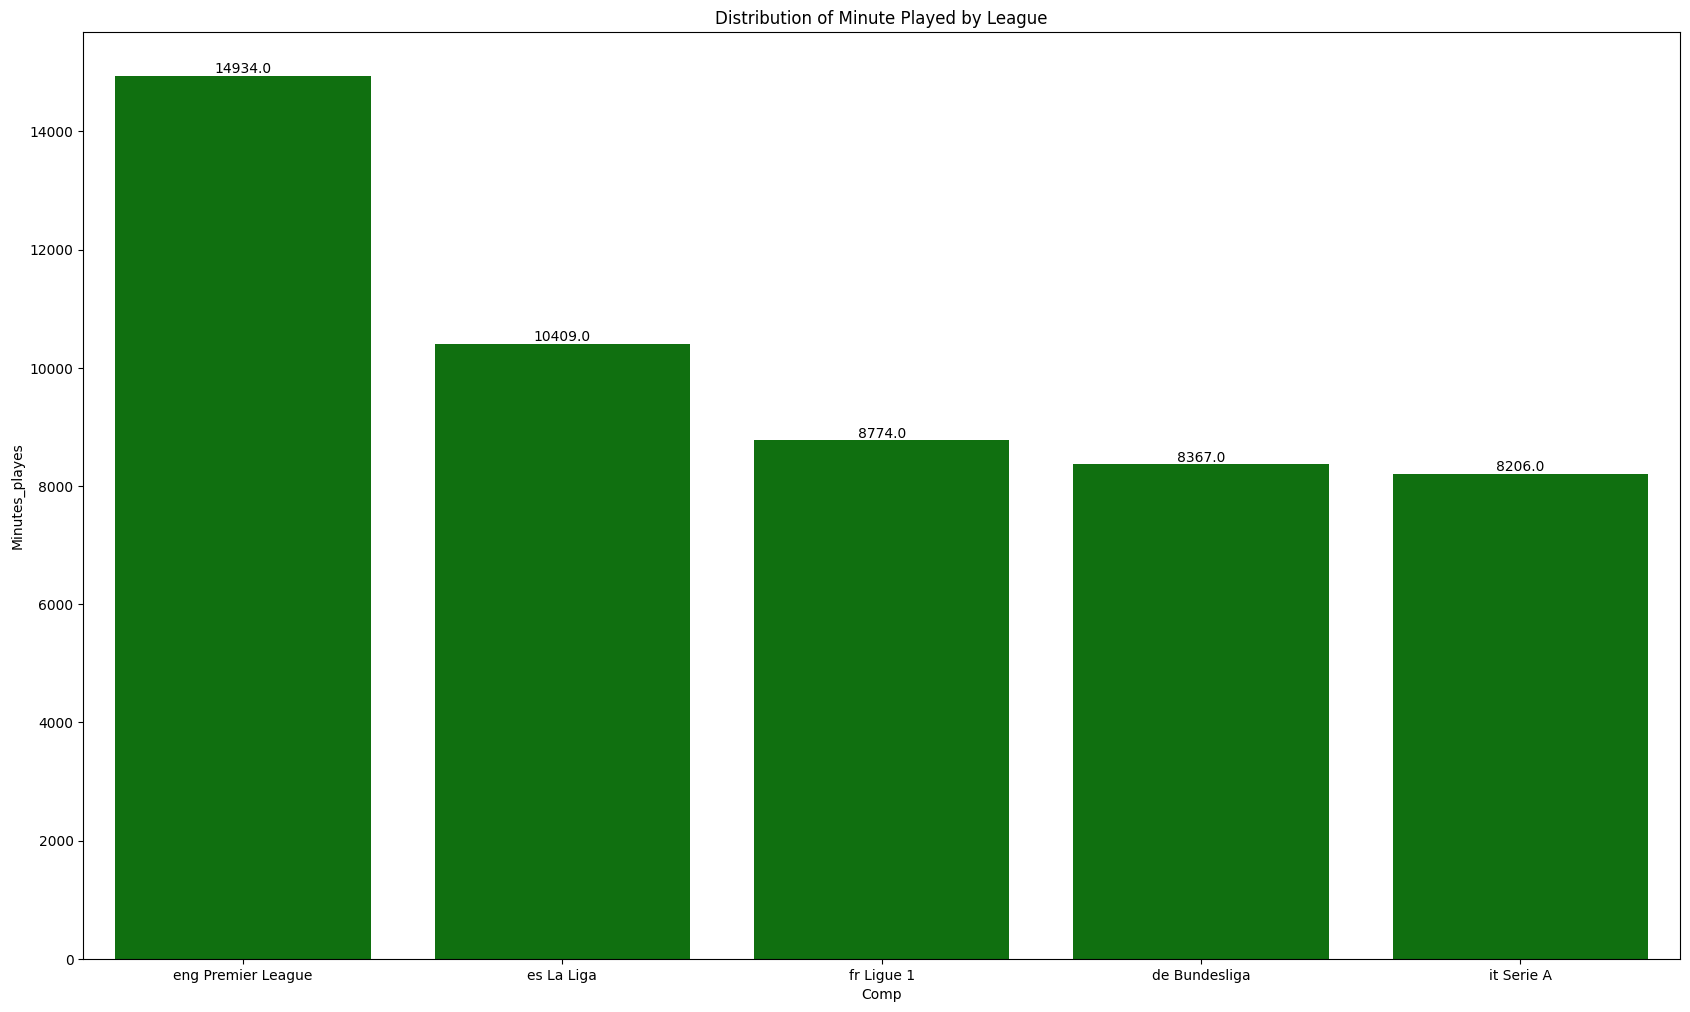

In [216]:
# Distribution of Minute Played by League
ligue_minute=Ligue_data[["Comp","Minutes_playes"]].sort_values(by='Minutes_playes',ascending=False).reset_index()
ligue_minute.drop(columns='index',inplace=True)
plt.figure(figsize=(17,10))
sns.barplot(x=ligue_minute["Comp"],y=ligue_minute["Minutes_playes"],color='g')
for i,v in enumerate(ligue_minute["Minutes_playes"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Minute Played by League")

Text(0.5, 1.0, 'Distribution of Goals_exp_pen by League')

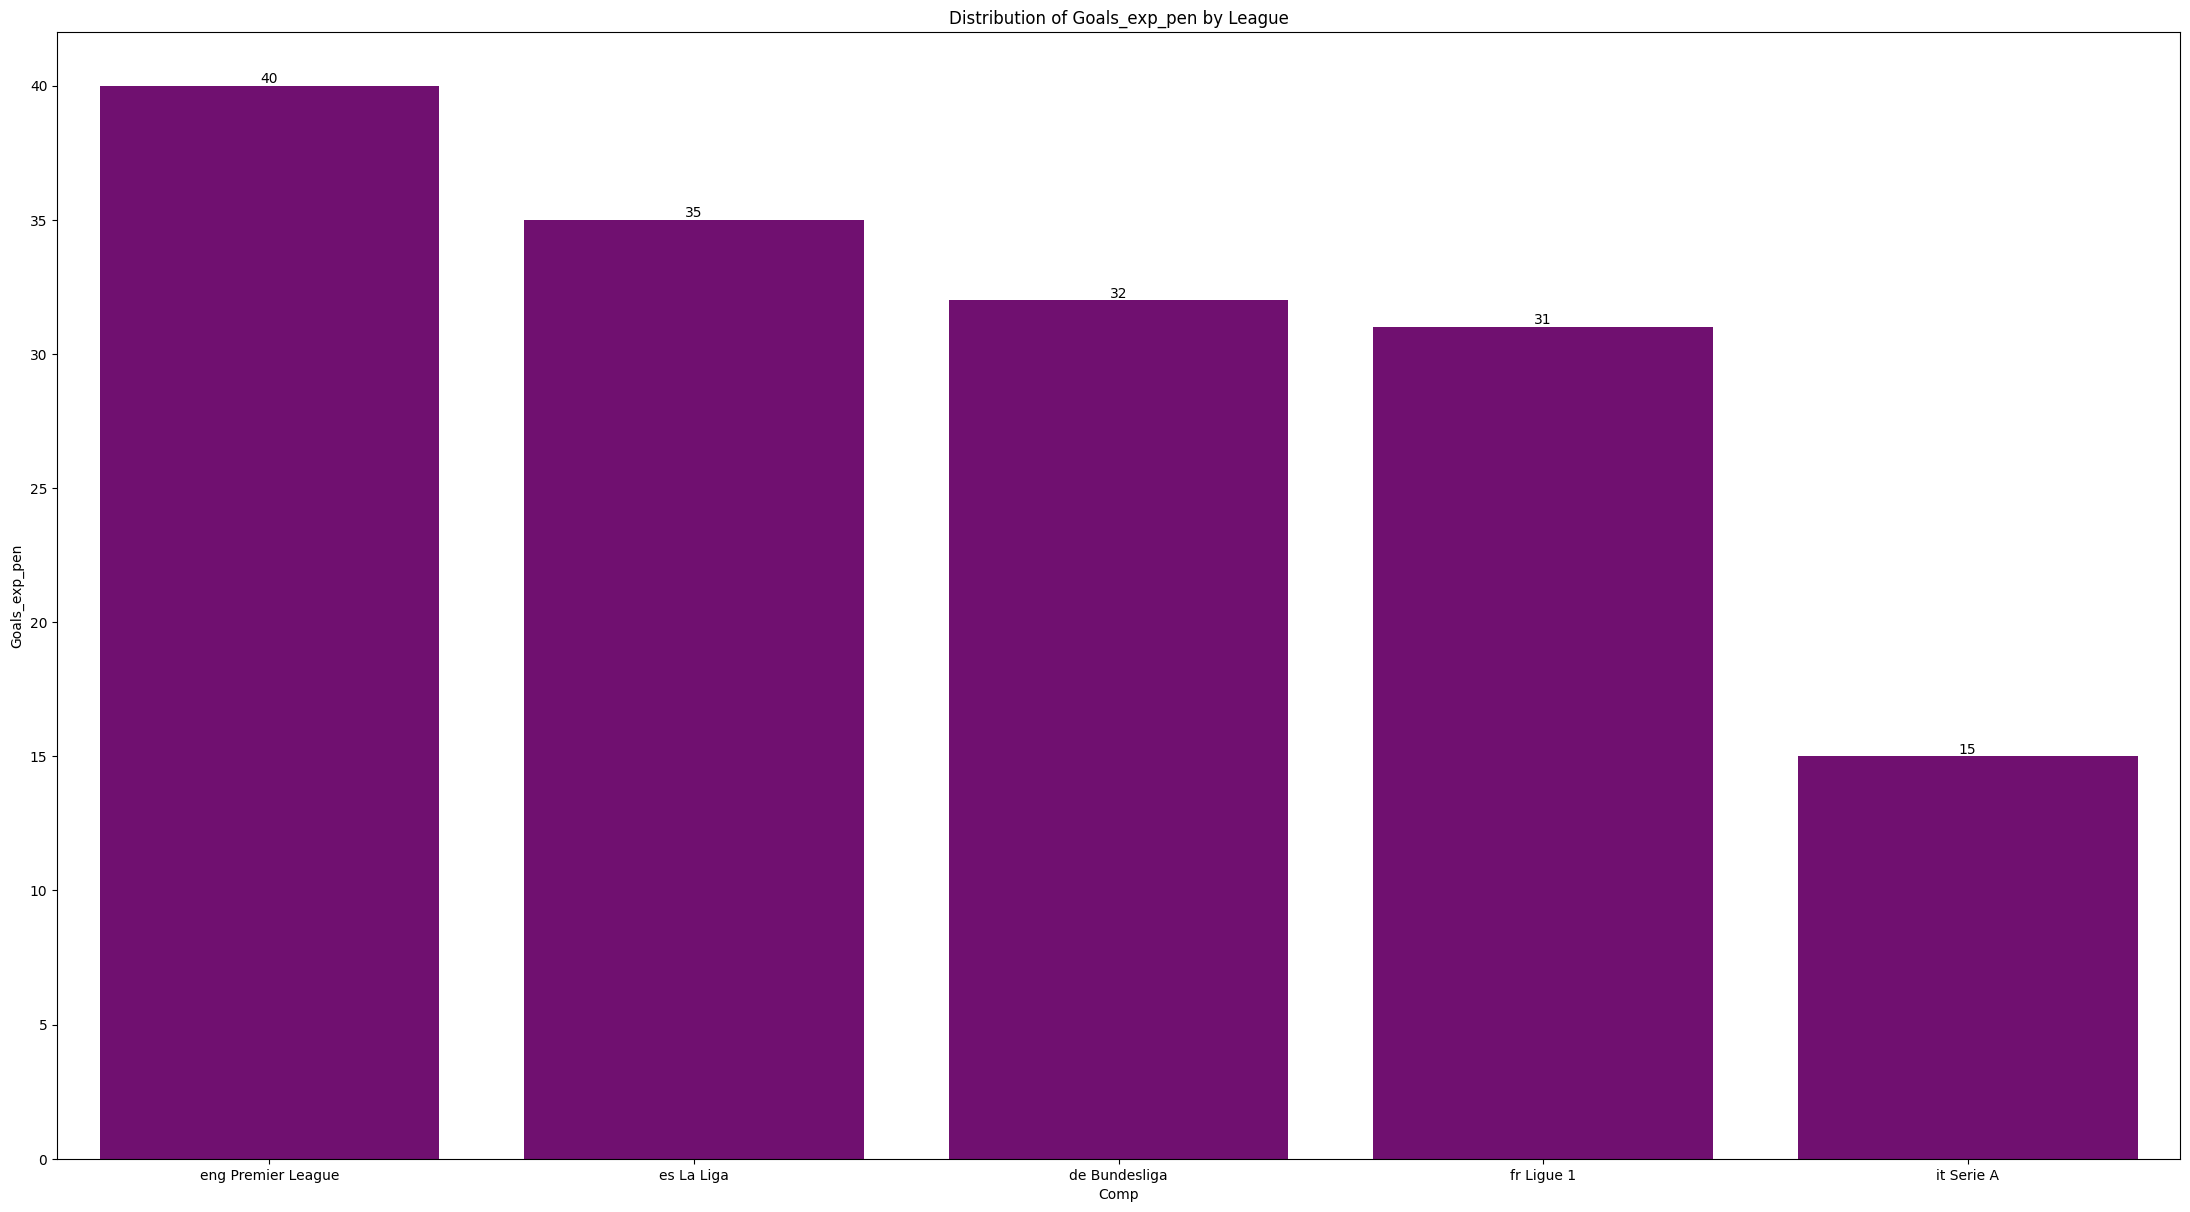

In [221]:
# Distribution of Goals_exp_pen by League
ligue_pen=Ligue_data[["Comp","Goals_exp_pen"]].sort_values(by='Goals_exp_pen',ascending=False).reset_index()
ligue_pen.drop(columns='index',inplace=True)
plt.figure(figsize=(22,12))
sns.barplot(x=ligue_pen["Comp"],y=ligue_pen["Goals_exp_pen"],color='purple')
for i,v in enumerate(ligue_pen["Goals_exp_pen"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Goals_exp_pen by League")

Text(0.5, 1.0, 'Distribution of Age by League')

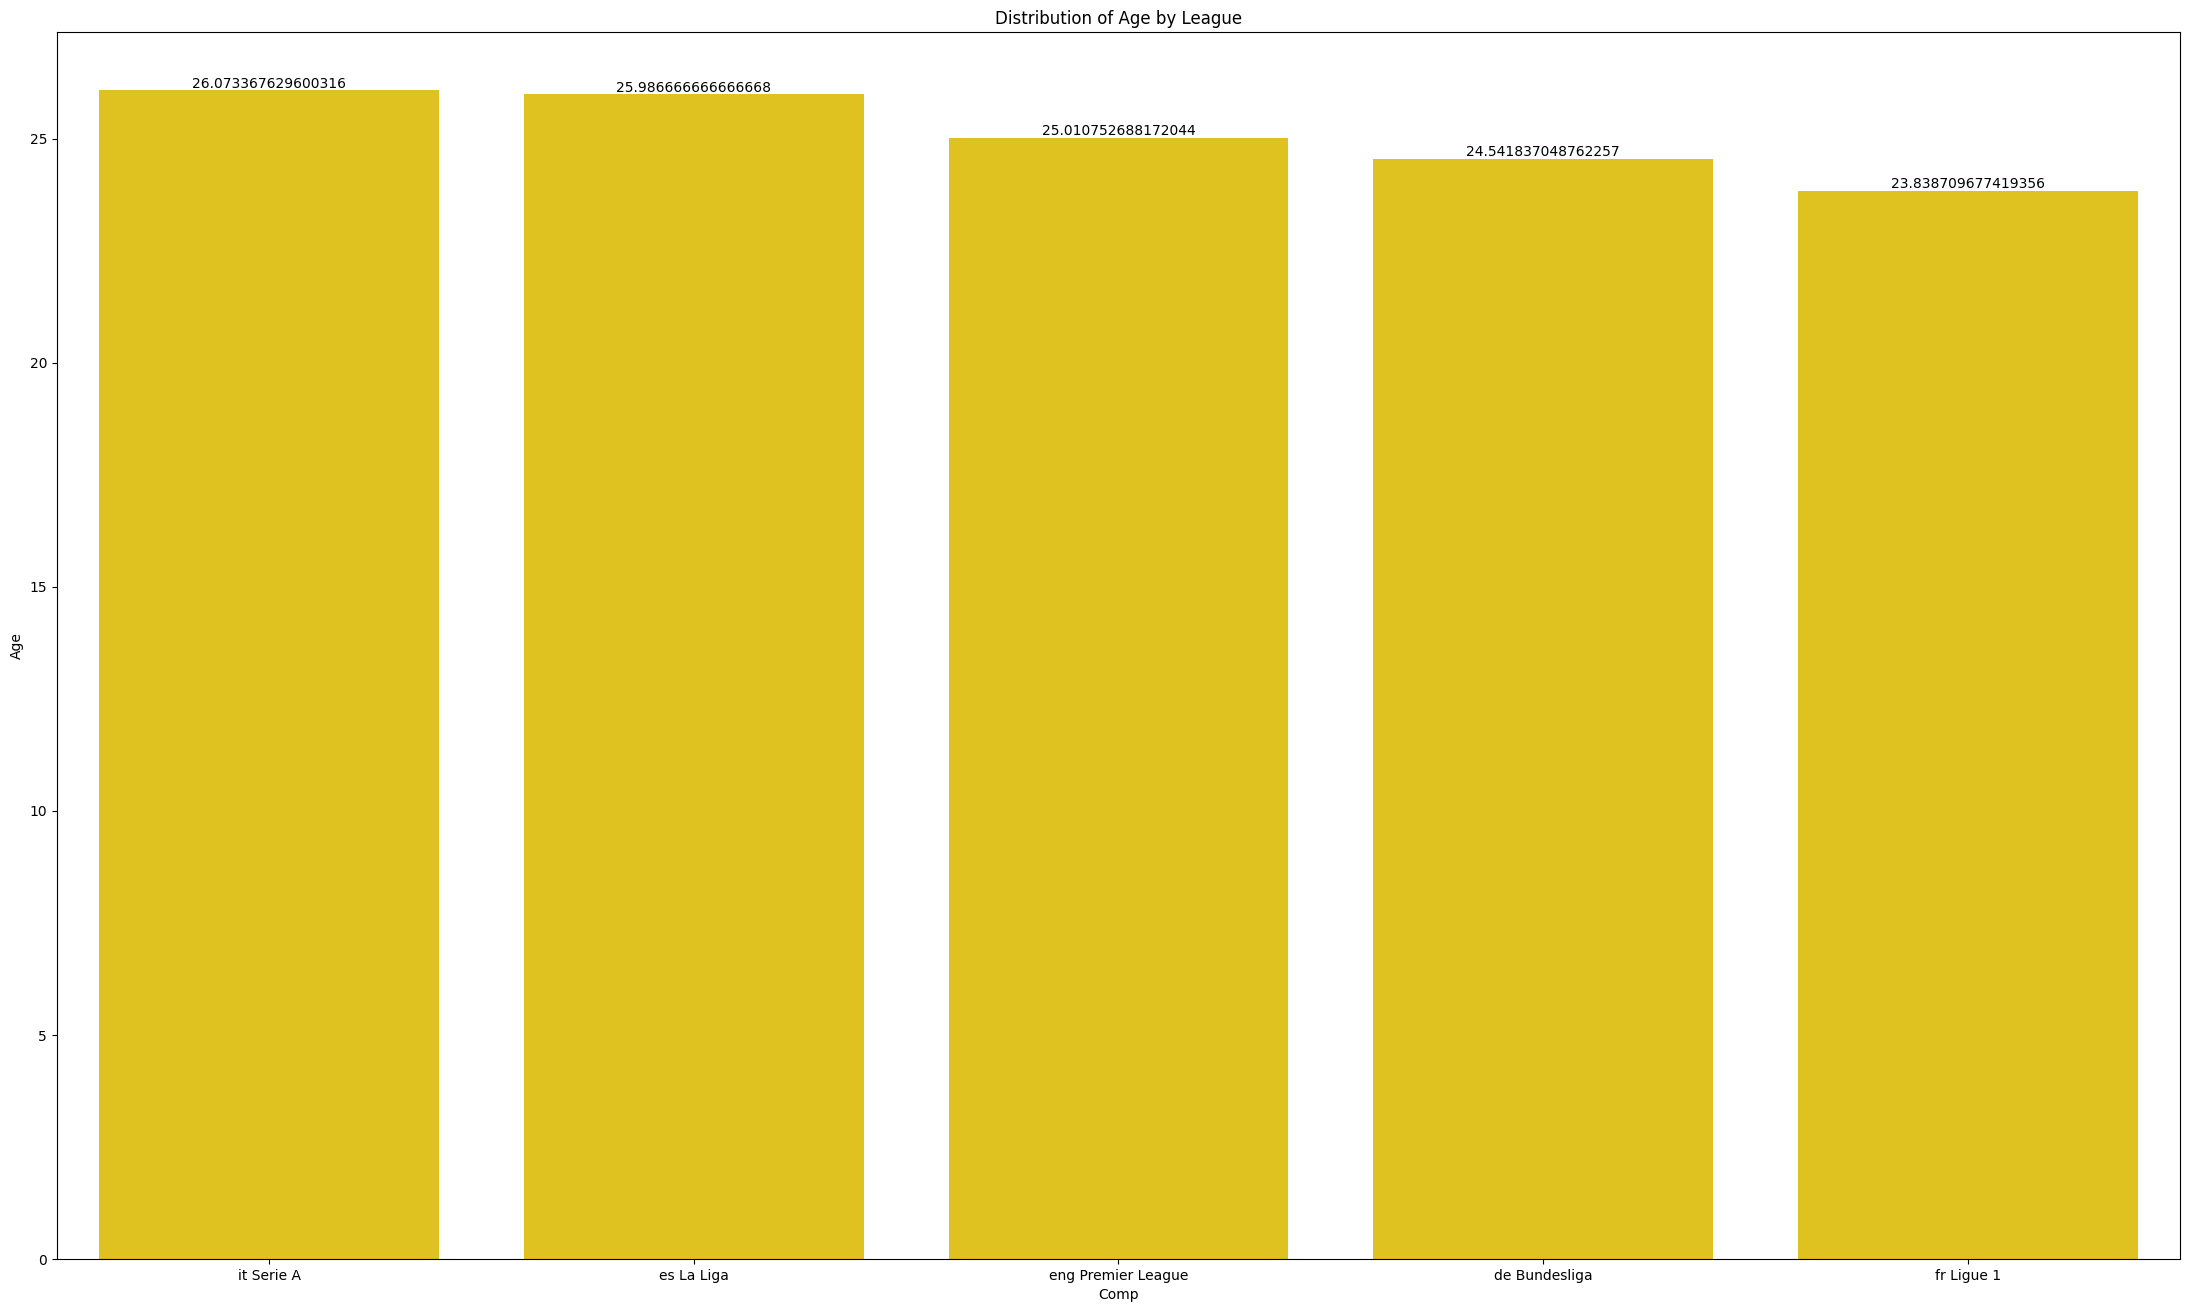

In [220]:
# Distribution of Age by League
ligue_age=Ligue_data[["Comp","Age"]].sort_values(by='Age',ascending=False).reset_index()
ligue_age.drop(columns='index',inplace=True)
plt.figure(figsize=(22,13))
sns.barplot(x=ligue_age["Comp"],y=ligue_age["Age"],color='gold')
for i , v in enumerate(ligue_age["Age"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Age by League")

In [226]:
# Best League
print("                                                                   Best League")
print(f"The Best League by Goals :   {Goals_ligue["Comp"][0]}")
print("-"*40)
print(f"The Best League by Assists :   {ligue_assist["Comp"][0]}")
print("-"*40)
print(f"The Best League by Played Minutes :   {ligue_minute["Comp"][0]} ")
print("-"*40)
print(f"The Best League by Played Matches :   {Match_league["Comp"][0]} ")
print("-"*40)
print(f"The Best League by Played Minutes :   {ligue_pen["Comp"][0]} ")

                                                                   Best League
The Best League by Goals :   eng Premier League
----------------------------------------
The Best League by Assists :   de Bundesliga
----------------------------------------
The Best League by Played Minutes :   eng Premier League 
----------------------------------------
The Best League by Played Matches :   eng Premier League 
----------------------------------------
The Best League by Played Minutes :   eng Premier League 


Text(0.5, 1.0, 'Best Soccers')

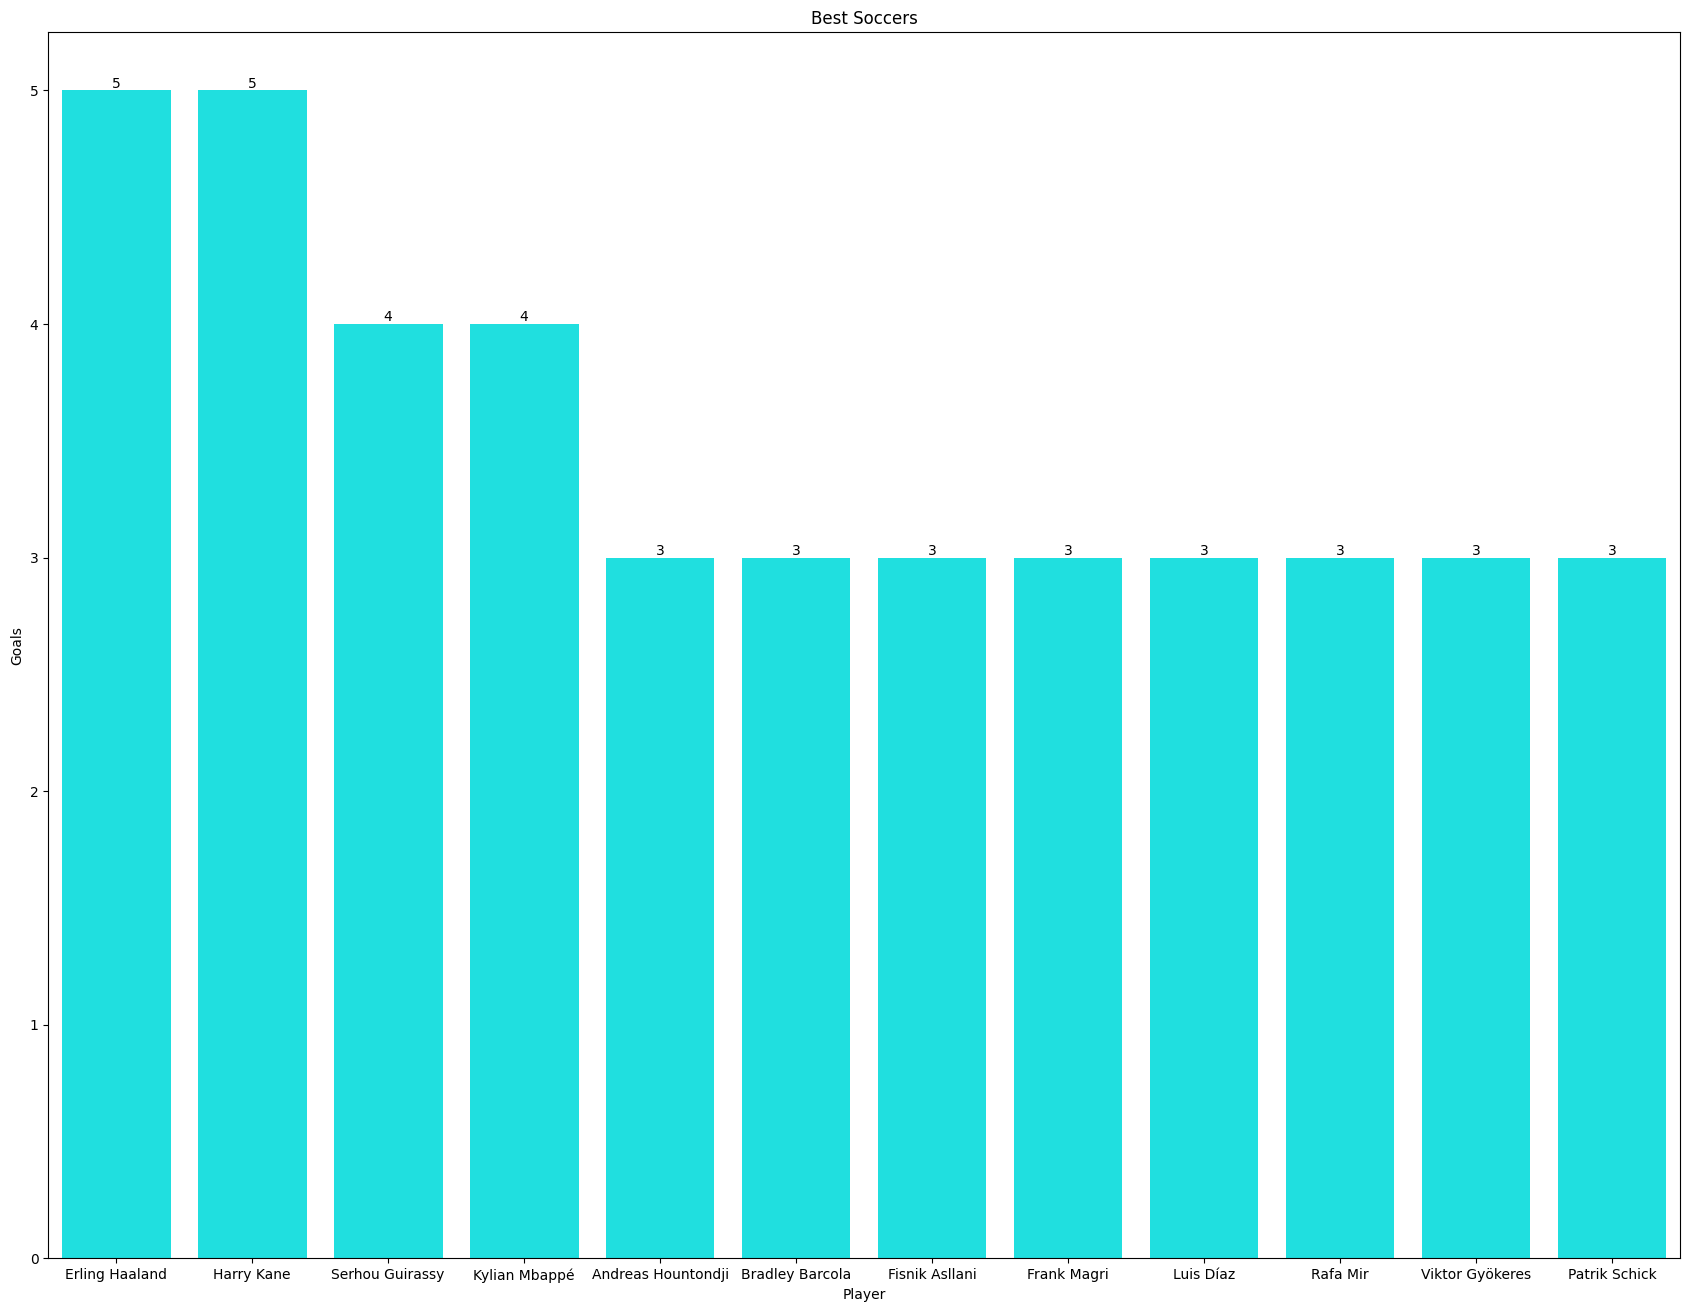

In [ ]:
# Best Soccer
temp=Most_goals[Most_goals["Goals"]>2]
plt.figure(figsize=(17,13))
sns.barplot(x=temp["Player"],y=temp["Goals"],color='cyan')
for i,v in enumerate(temp["Goals"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Best Soccers")

Text(0.5, 1.0, 'Best Soccers exp_pen')

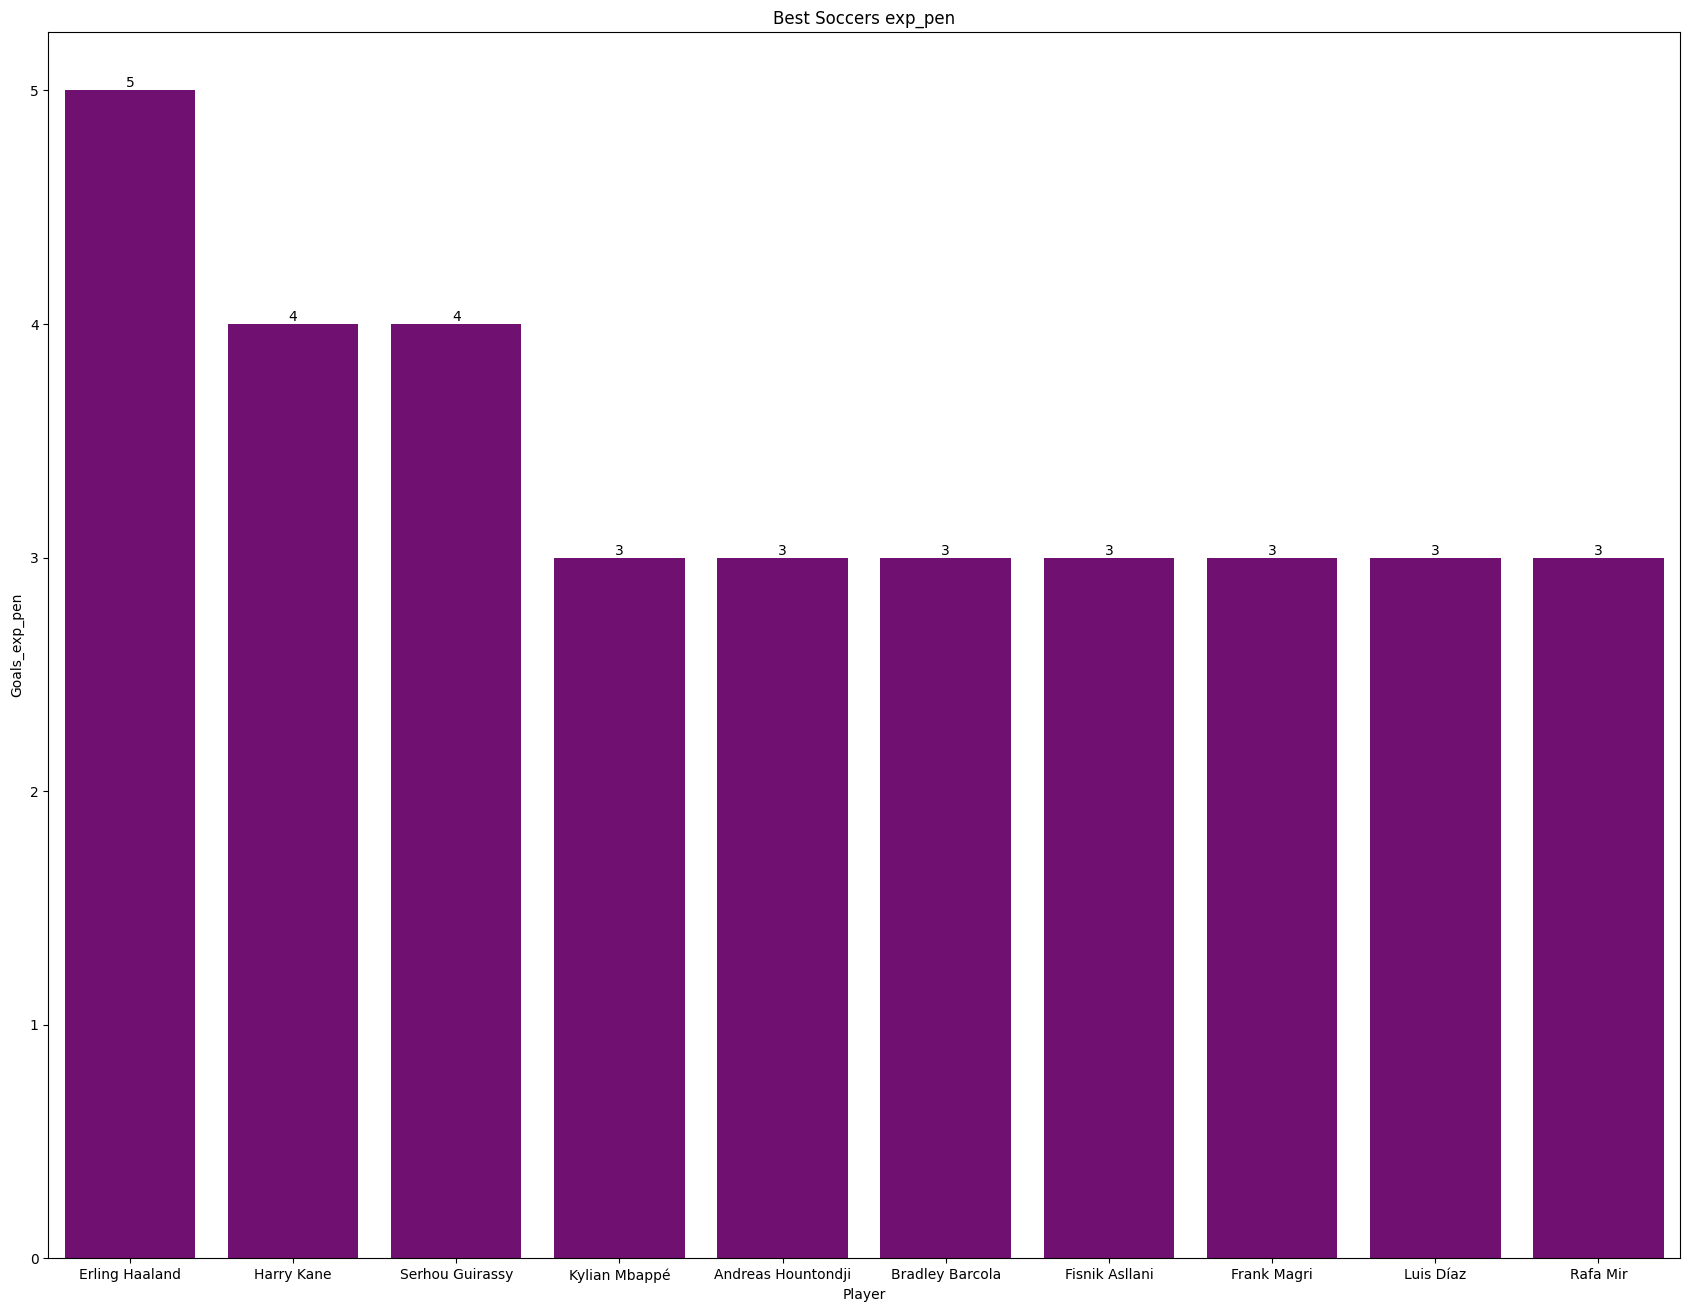

In [ ]:
# Best Soccers exp_pen
temp=Most_goals[Most_goals["Goals_exp_pen"]>2]
plt.figure(figsize=(17,13))
sns.barplot(x=temp["Player"],y=temp["Goals_exp_pen"],color='purple')
for i,v in enumerate(temp["Goals_exp_pen"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Best Soccers exp_pen")

Text(0.5, 1.0, 'Most Assist')

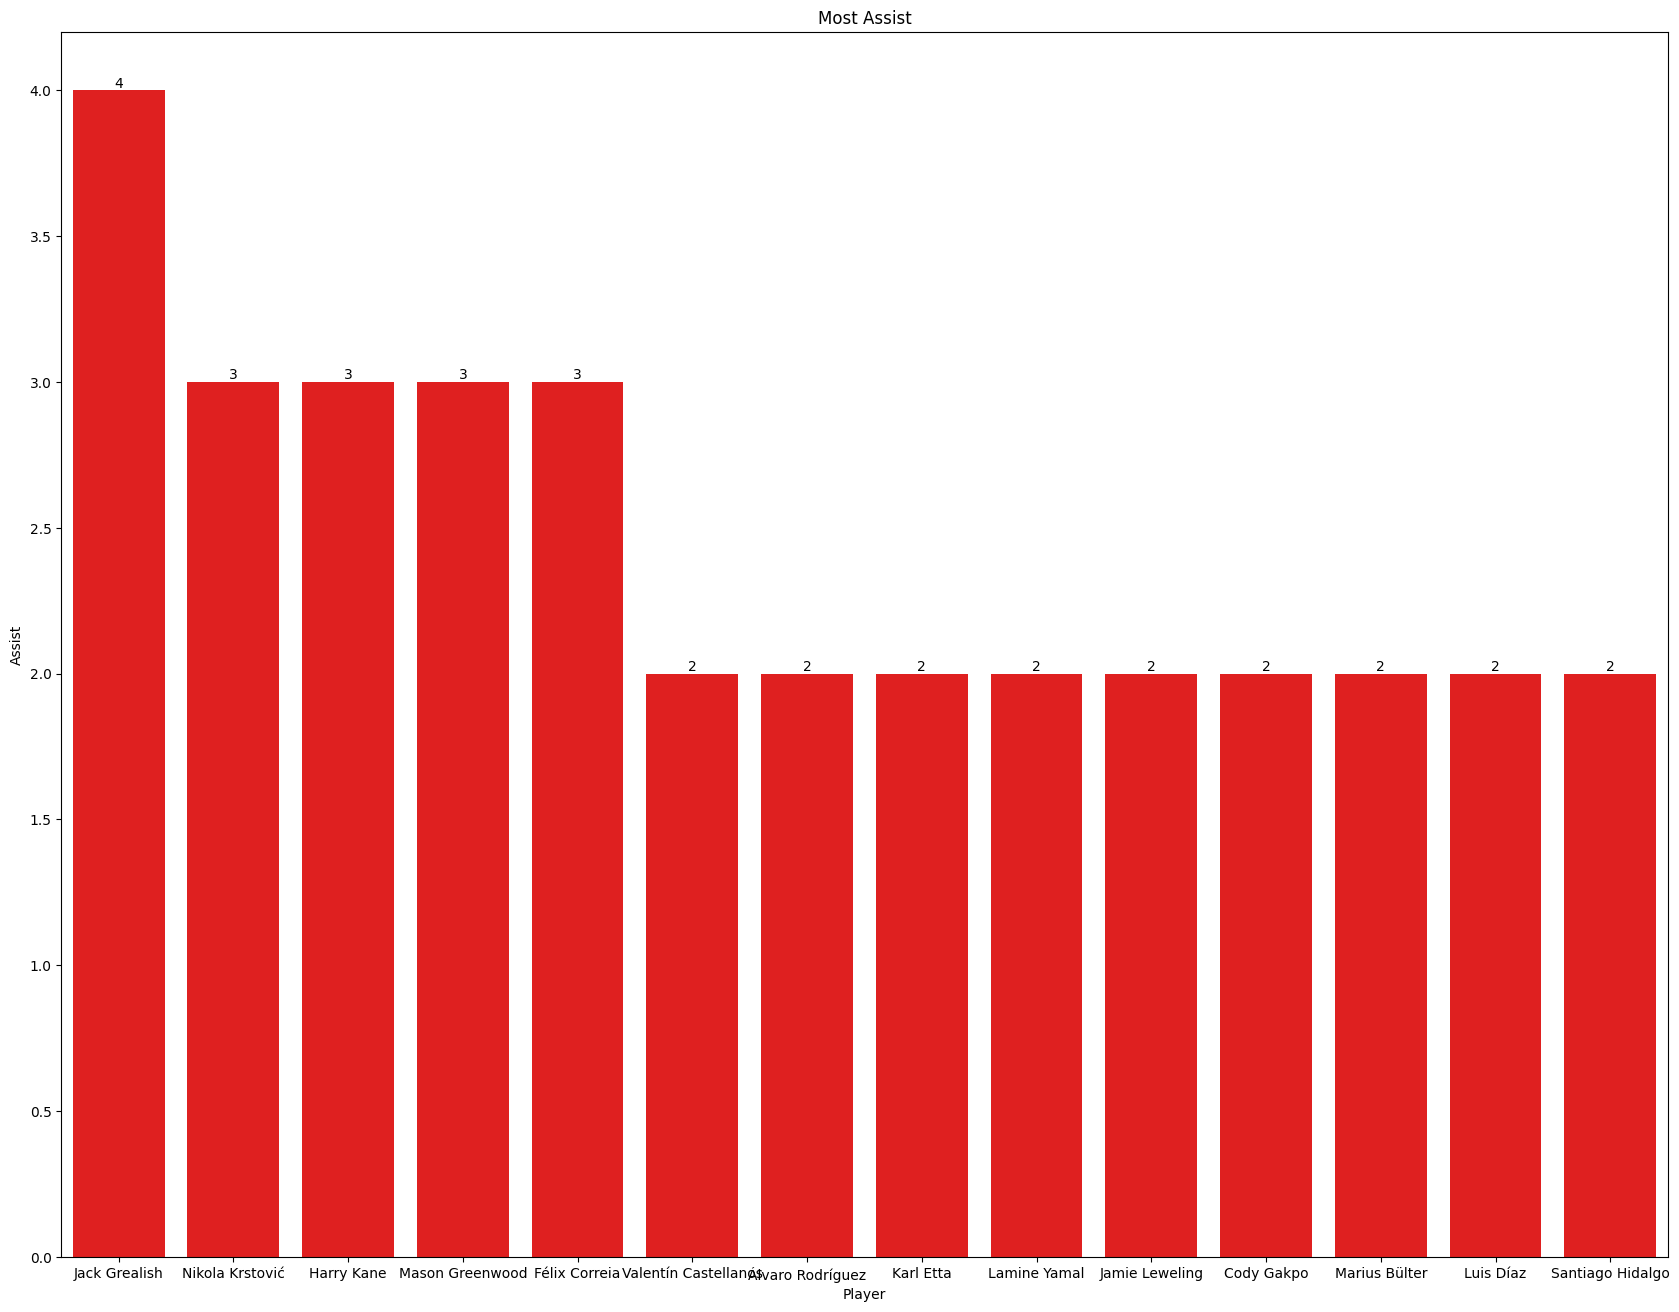

In [250]:
# Most Assist
temp=Most_assist[Most_assist["Assist"]>=2]
plt.figure(figsize=(17,13))
sns.barplot(x=temp["Player"],y=temp["Assist"],color='r')
for i,v in enumerate(temp["Assist"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Most Assist")

Text(0.5, 1.0, 'Distribution of Played Minutes by Player')

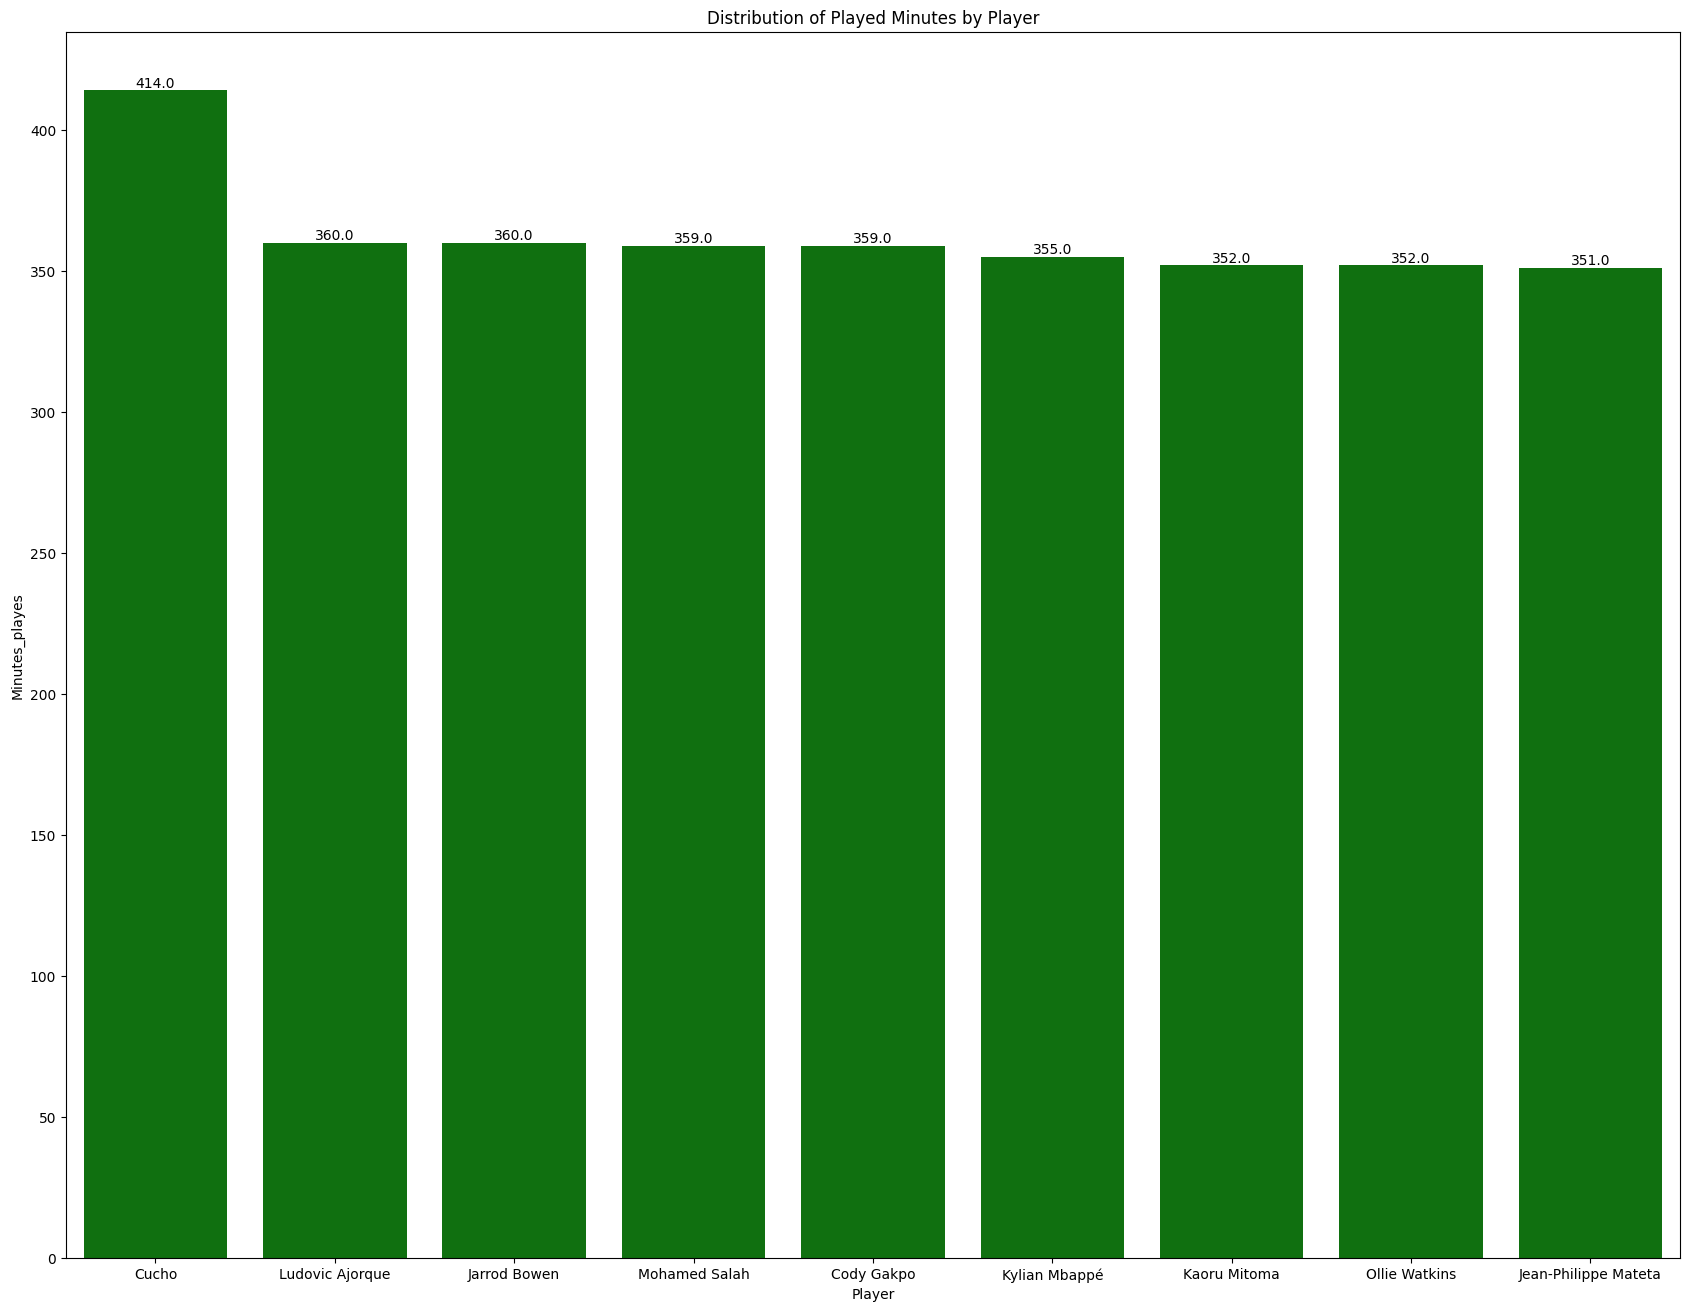

In [260]:
# Distribution of Played Minutes by Player
temp=Best_performance[Best_performance["Minutes_playes"]>350].sort_values(by="Minutes_playes",ascending=False)
plt.figure(figsize=(17,13))
sns.barplot(x=temp["Player"],y=temp["Minutes_playes"],color='g')
for i,v in enumerate(temp["Minutes_playes"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Distribution of Played Minutes by Player")

Text(0.5, 1.0, 'Best Performance')

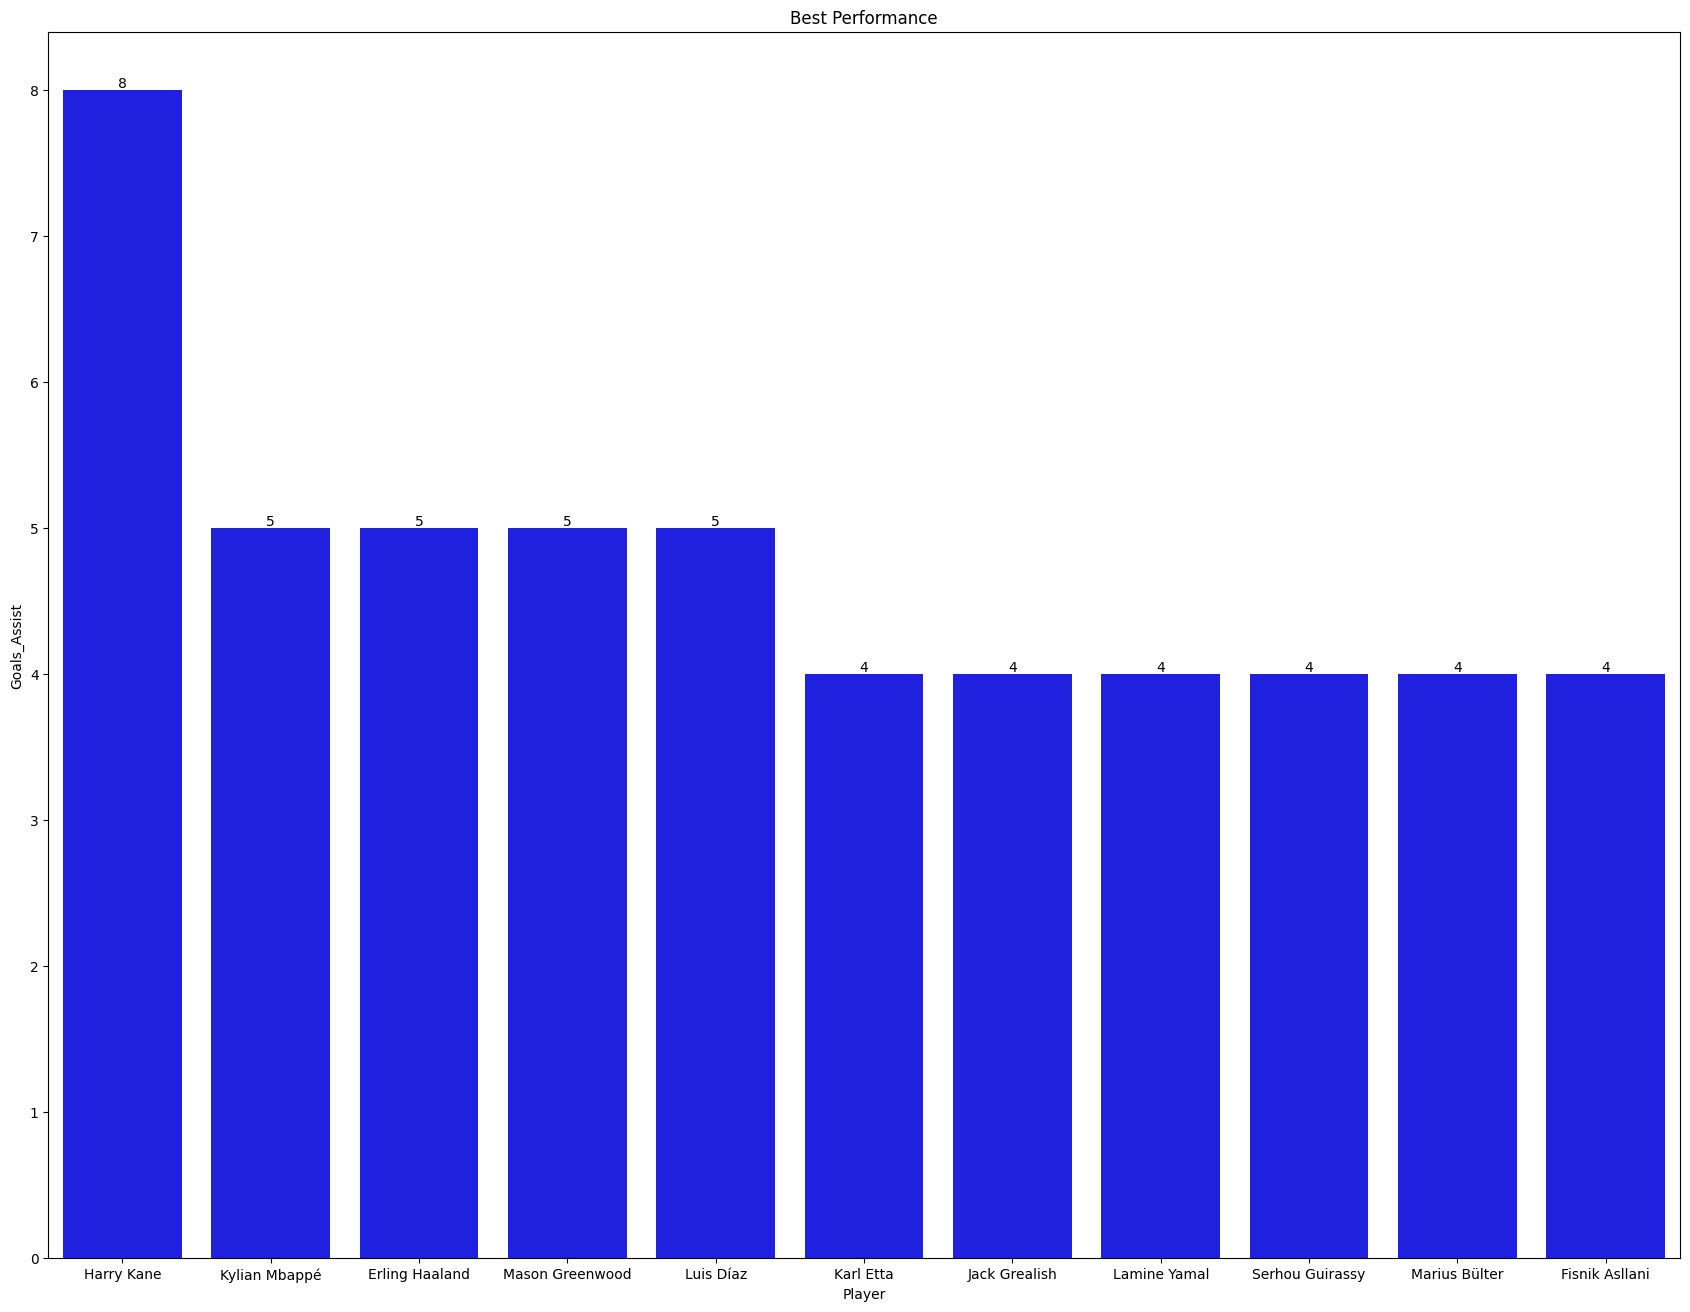

In [261]:
# Best Performance
Best=Best_performance[Best_performance["Goals_Assist"]>=4]
plt.figure(figsize=(17,13))
sns.barplot(x=Best["Player"],y=Best["Goals_Assist"],color='b')
for i,v in enumerate(Best["Goals_Assist"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.tight_layout()
plt.title("Best Performance")

In [263]:
# The Top 3 Performance 
print("                                                                   The Best Players ")
print(f"The Best Players : \n 1: {Best["Player"][0]} \n 2: {Best["Player"][1]} \n 3: {Best["Player"][2]}")

                                                                   The Best Players 
The Best Players : 
 1: Harry Kane 
 2: Kylian Mbappé 
 3: Erling Haaland
